# **Final Project: Predicting IGBT Failure Due To Thermal Overstress**
By Sanatan Mishra, Aidan Chan, and Mahika Maini

In [ ]:
!pip install scikeras

In [ ]:
from google.colab import files
import scipy.io
import pandas as pd
import numpy as np
import datetime
from numpy.lib import recfunctions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import math

## Converting Data to CSV

In [ ]:
uploaded = files.upload()

Saving Device2  1.mat to Device2  1.mat


In [ ]:
data_set = scipy.io.loadmat('Device2  1.mat', struct_as_record=True, squeeze_me=True, mat_dtype=False)
print(data_set)
df = pd.DataFrame(data_set['measurement'])
df

In [ ]:
mat = scipy.io.loadmat('Device2  1.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
df = pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})

In [ ]:
data_set = scipy.io.loadmat("Device2  1.mat")


dict_keys(['__header__', '__version__', '__globals__', 'measurement'])


TypeError: ignored

In [ ]:
arr = mat['measurement']
arr = recfunctions.repack_fields(arr)
spam = arr.tolist()
recfunctions.repack_fields(spam[0][0][0])
for a in spam:
  for b in a:
    for c in b:
      c = recfunctions.repack_fields(c)
      c = c.tolist()
      for d in c:
        for e in d:
          for f in e:
            f = recfunctions.repack_fields(f)
            f = f.tolist()
            for g in f:
              for h in g:
                if (type(h) == tuple):
                  for i in h:
                    i = recfunctions.repack_fields(i)
                    i = i.tolist()
      print(c)

[[(array(['12/24/2008 9:59:46 AM'], dtype='<U21'), array([[3.31298639e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8)), (array(['12/24/2008 9:59:47 AM'], dtype='<U21'), array([[3.31298639e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8)), (array(['12/24/2008 10:00:51 AM'], dtype='<U22'), array([[3.31298645e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[1]], dtype=uint8)), (array(['12/24/2008 10:00:58 AM'], dtype='<U22'), array([[3.31298646e+09]]), array([[99]], dtype=uint8), array([[100]], d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
spam

[[(array([[(array(['12/24/2008 9:59:46 AM'], dtype='<U21'), array([[3.31298639e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8)),
           (array(['12/24/2008 9:59:47 AM'], dtype='<U21'), array([[3.31298639e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8)),
           (array(['12/24/2008 10:00:51 AM'], dtype='<U22'), array([[3.31298645e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[1]], dtype=uint8)),
           (array(['12/24/2008 10:00:58 AM'], dtype='<U22'), array([[3.31298646e+09]]), ar

In [ ]:
mat['measurement'].tolist()

[[(array([[(array(['12/24/2008 9:59:46 AM'], dtype='<U21'), array([[3.31298639e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8)),
           (array(['12/24/2008 9:59:47 AM'], dtype='<U21'), array([[3.31298639e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8)),
           (array(['12/24/2008 10:00:51 AM'], dtype='<U22'), array([[3.31298645e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[1]], dtype=uint8)),
           (array(['12/24/2008 10:00:58 AM'], dtype='<U22'), array([[3.31298646e+09]]), ar

In [ ]:
for i in df:
  print(i)
  print(type(df[i]))
  print(df[i].dtype)
  print(df[i].ndim)
  print(df[i].size)
  print(df[i].dtypes)

print(df[i].keys)
print(df[i].get("pwmTempControllerState"))

data = pd.DataFrame(df[i].astype('object'), columns = ["pwmTempControllerState"])
data

measurement
<class 'pandas.core.series.Series'>
[('pwmTempControllerState', 'O'), ('transient', 'O'), ('steadyState', 'O')]
1
1
[('pwmTempControllerState', 'O'), ('transient', 'O'), ('steadyState', 'O')]


TypeError: ignored

In [ ]:
df.dropna()

## Adding Y Variable

In [ ]:
uploaded = files.upload()

Saving 2a.csv to 2a (3).csv


In [ ]:
df = pd.read_csv('5a.csv')

In [ ]:
for i in range(1, len(df)):
  delta_y = df.iloc[i]['supplyVoltage'] - df.iloc[i - 1]['supplyVoltage']
  if delta_y < -0.075 and i > 7000:
    print(i)
    break

last_row = i

In [ ]:
df = df.drop(labels = range(last_row + 1, len(df)), axis = 0)

In [ ]:
ruls = []
for i in range(len(df)):
  ruls.append(df.iloc[-1]['timeEpoch'] - df.iloc[i]['timeEpoch'])
remaining_useful_lifespans = []
for r in range(len(ruls)):
  remaining_useful_lifespans.append(ruls[r] / ruls[0])
df['remainingUsefulLifespan'] = remaining_useful_lifespans
df

In [ ]:
df.to_csv('5a.csv')

## Exploratory Data Analysis

In [ ]:
files.upload()
df = pd.read_csv('2a.csv')

Saving 2a.csv to 2a.csv


<Axes: xlabel='supplyVoltage', ylabel='shutdownTemp'>

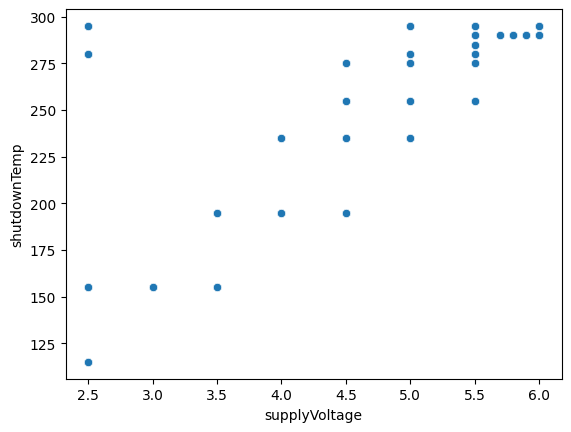

In [ ]:
# Scatterplot showing supply voltage seems to be positively correlated with shutdown temperature
sns.scatterplot(df, x='supplyVoltage', y='shutdownTemp')

In [ ]:
summary = df.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99])
summary

Unnamed: 0.1   Unnamed: 0     timeEpoch  supplyVoltage  node1Voltage  \
count   10742.00000  10742.00000  1.074200e+04   10742.000000  10742.000000   
mean     5370.50000   5370.50000  3.312988e+09       4.768416      4.766063   
std      3101.09263   3101.09263  7.076200e+02       0.894646      0.894682   
min         0.00000      0.00000  3.312986e+09       2.439359      2.439020   
1%        107.41000    107.41000  3.312986e+09       2.448302      2.445928   
5%        537.05000    537.05000  3.312987e+09       2.461683      2.459744   
10%      1074.10000   1074.10000  3.312987e+09       3.442539      3.437928   
25%      2685.25000   2685.25000  3.312987e+09       4.427581      4.424402   
50%      5370.50000   5370.50000  3.312988e+09       5.416810      5.413639   
75%      8055.75000   8055.75000  3.312988e+09       5.426576      5.424692   
90%      9666.90000   9666.90000  3.312989e+09       5.429367      5.427456   
95%     10203.95000  10203.95000  3.312989e+09       5.430762      5.428837   
99%     10633.59000  10633.59000  3.312989e+09       5.432157      5.431600   
max     10741.00000  10741.00000  3.312989e+09       5.448900      5.442653   

       node2Voltage  collectorEmitterCurrent  heatSinkTemperature  \
count  10742.000000             10742.000000         10742.000000   
mean       4.430225                 0.108018           718.949704   
std        0.930724                 0.036889             0.095038   
min        1.737816                -0.220997           718.787773   
1%         1.934803                 0.041464           718.801617   
5%         2.345126                 0.080834           718.810847   
10%        2.955204                 0.083021           718.824695   
25%        3.948231                 0.087395           718.861635   
50%        4.935863                 0.089582           718.944811   
75%        5.079720                 0.139888           719.037330   
90%        5.172397                 0.153011           719.078999   
95%        5.429679                 0.159572           719.102158   
99%        5.432446                 0.198941           719.116056   
max        5.435212                 0.450467           719.125324   

       packageTemperature  internalTemperature  ambientTemperature  \
count        10742.000000         10742.000000                 0.0   
mean           228.303312         -2256.979105                 NaN   
std             61.070039             1.821767                 NaN   
min             30.080334         -2260.584153                 NaN   
1%              67.027648         -2260.250874                 NaN   
5%              98.756348         -2260.028738                 NaN   
10%            117.637193         -2259.584582                 NaN   
25%            205.548883         -2258.696743                 NaN   
50%            258.075628         -2256.812157                 NaN   
75%            273.484001         -2255.372893                 NaN   
90%            278.343289         -2254.709167                 NaN   
95%            279.640071         -2254.377433                 NaN   
99%            280.902855         -2254.156325                 NaN   
max            283.655077         -2253.824736                 NaN   

       remainingUsefulLifespan  
count             10742.000000  
mean                  0.500477  
std                   0.289046  
min                   0.000000  
1%                    0.009874  
5%                    0.049127  
10%                   0.099383  
25%                   0.250342  
50%                   0.500962  
75%                   0.751009  
90%                   0.900324  
95%                   0.950227  
99%                   0.990036  
max                   1.000000

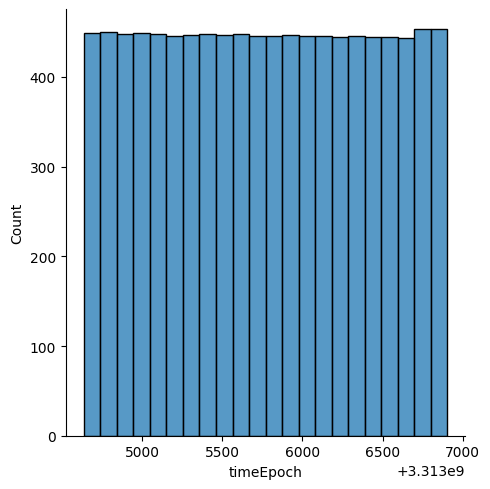

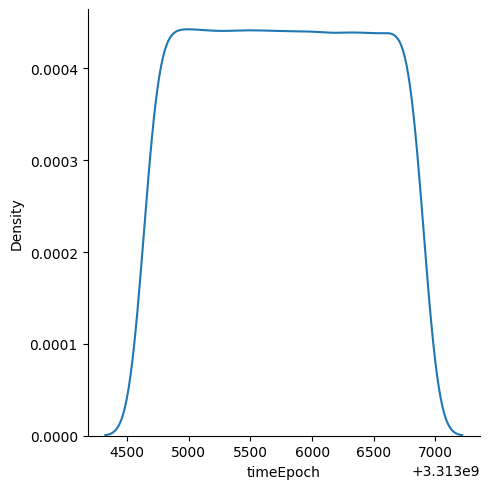

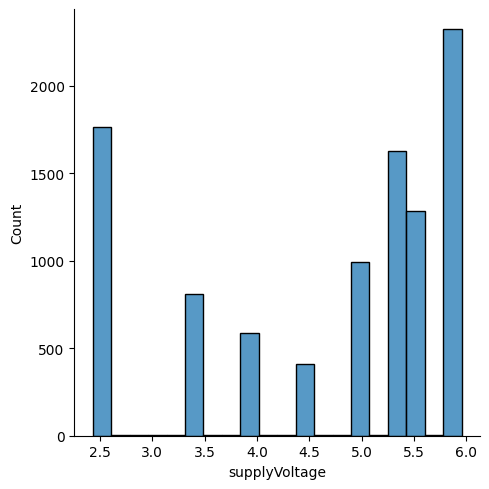

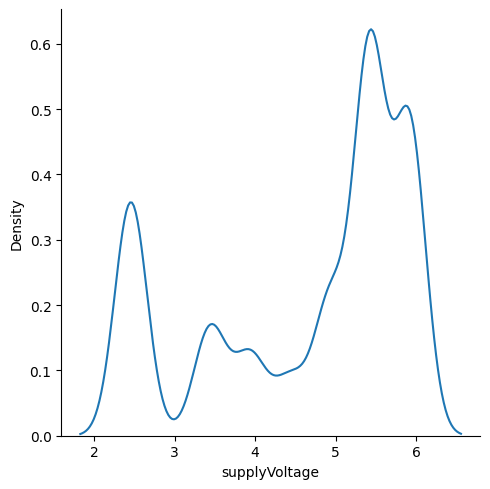

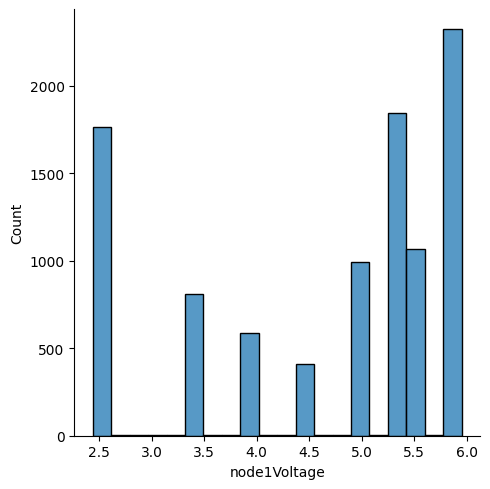

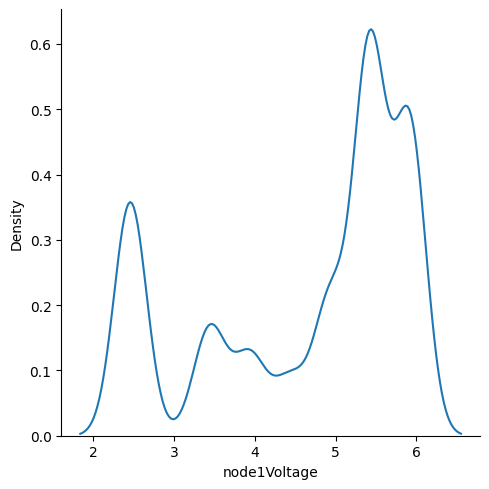

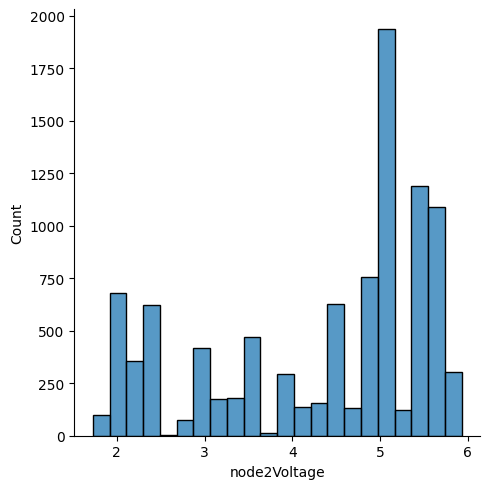

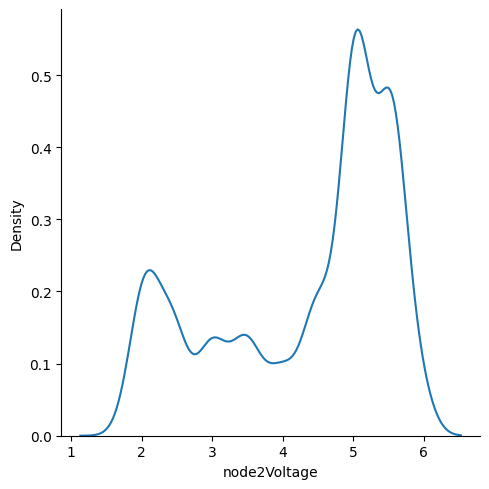

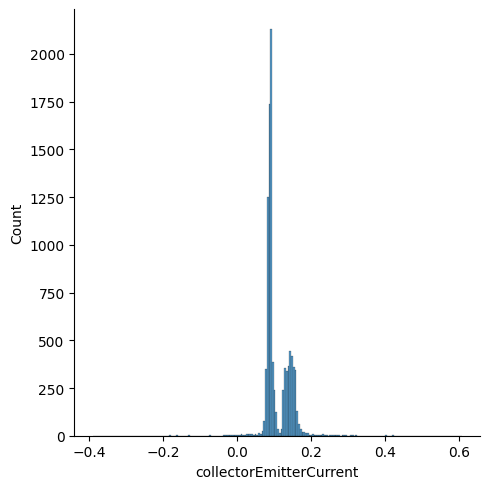

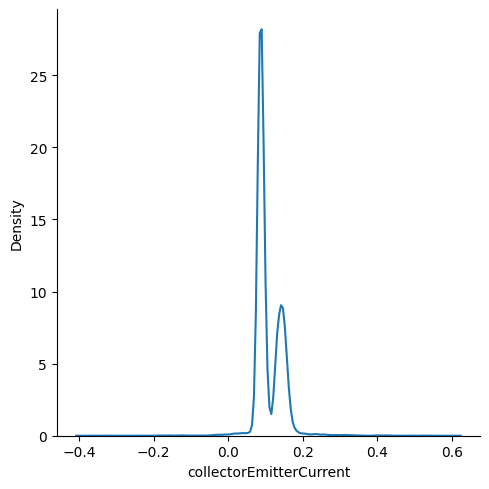

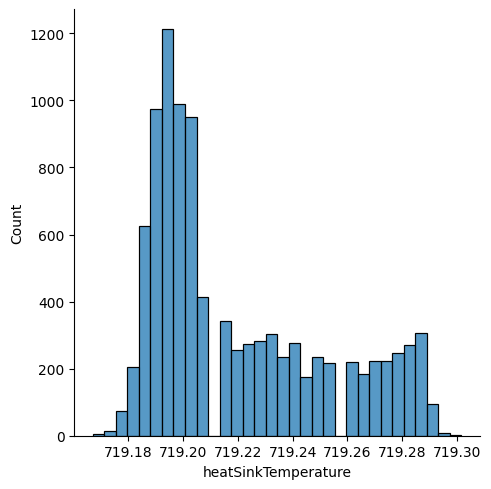

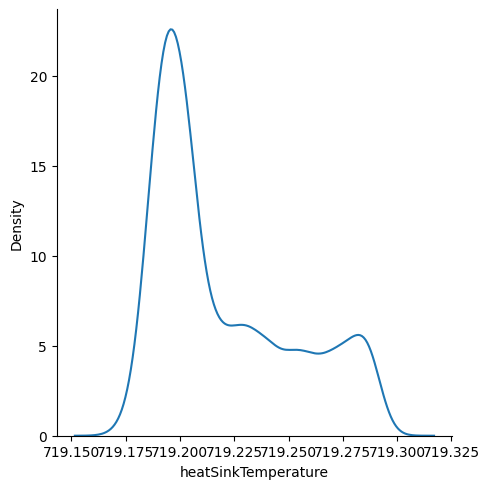

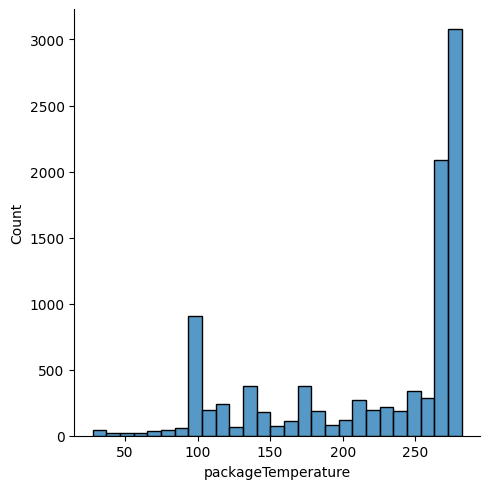

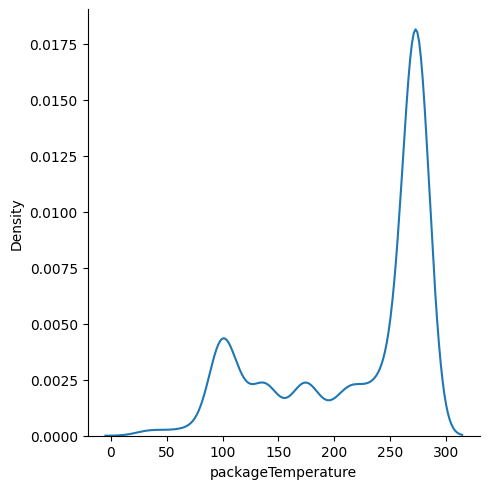

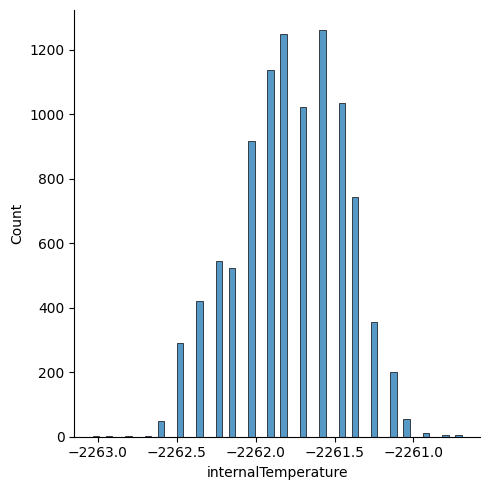

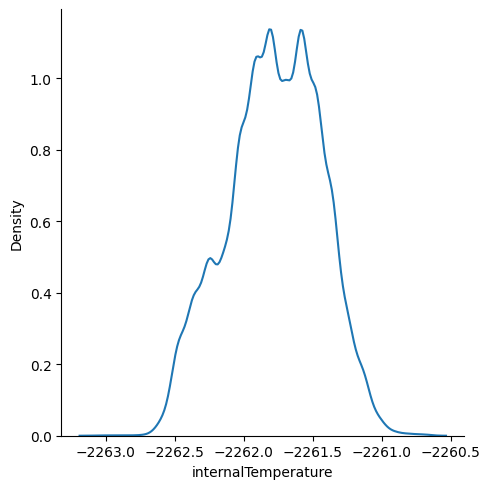

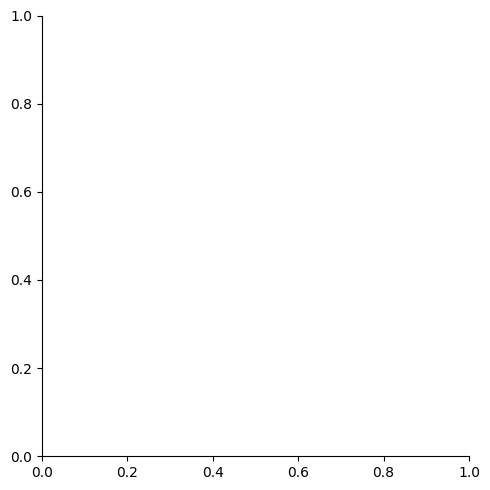

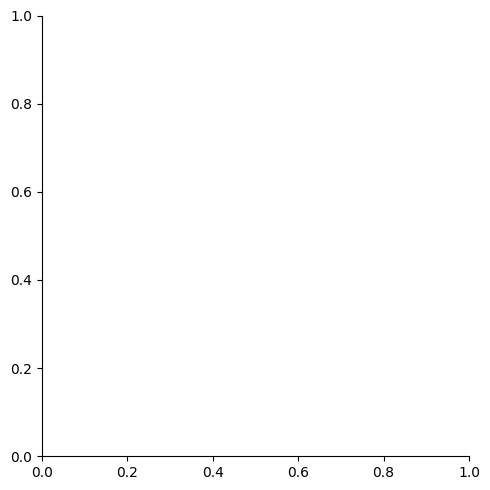

In [ ]:
# Distribution Plots
for k in df:
  if df.dtypes[k] != 'object':
    sns.displot(df, x = k)
    sns.displot(df, x = k, kind = "kde")

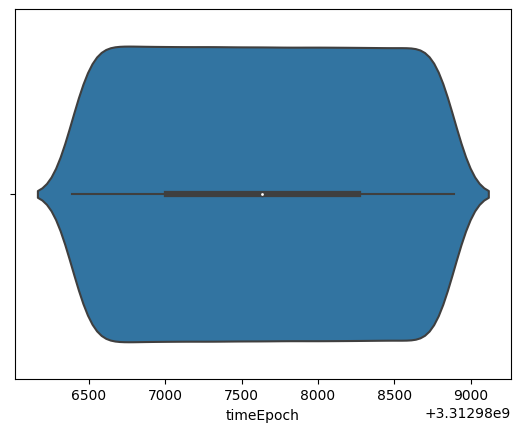

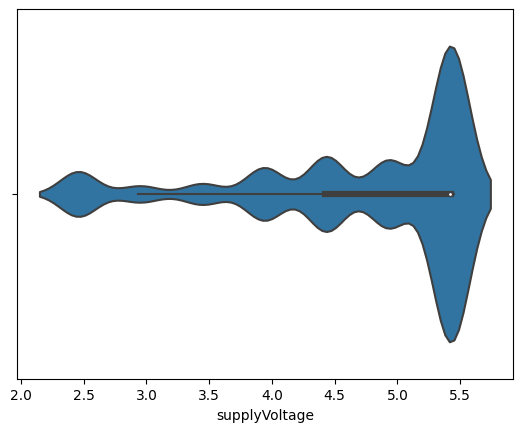

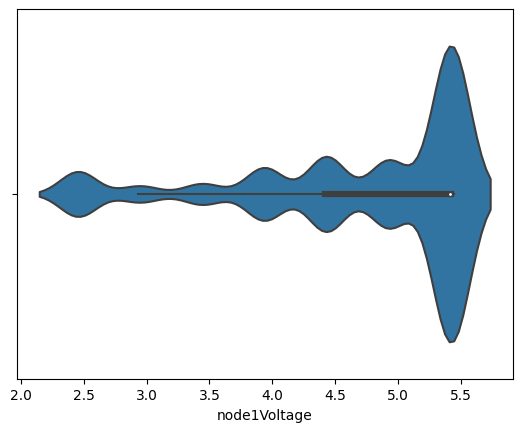

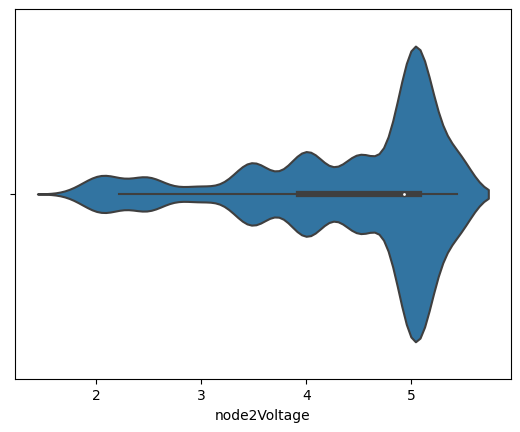

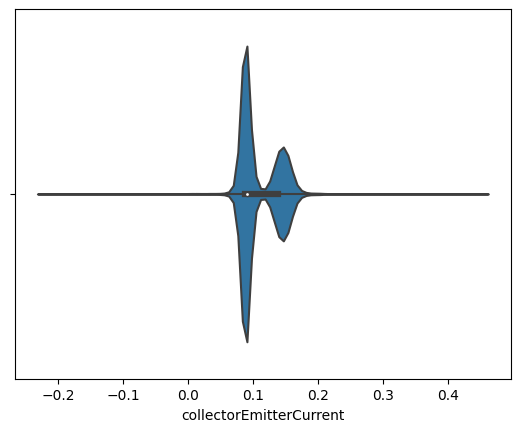

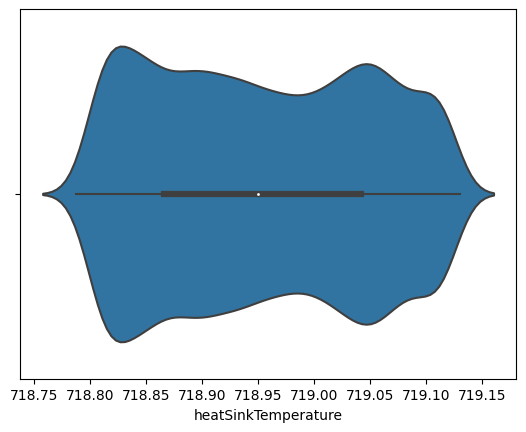

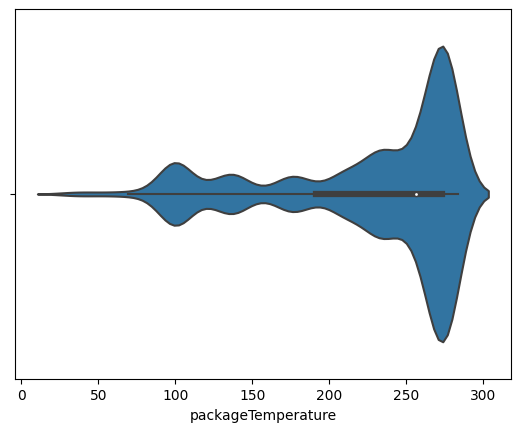

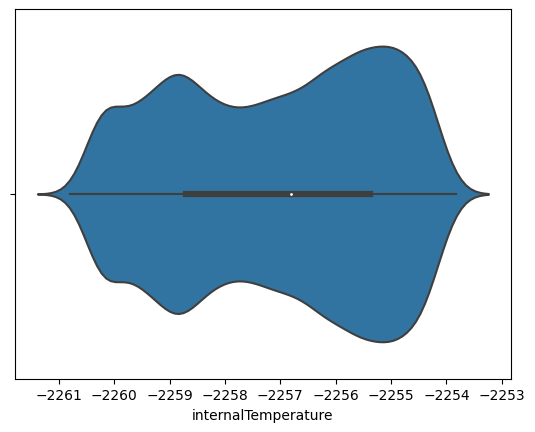

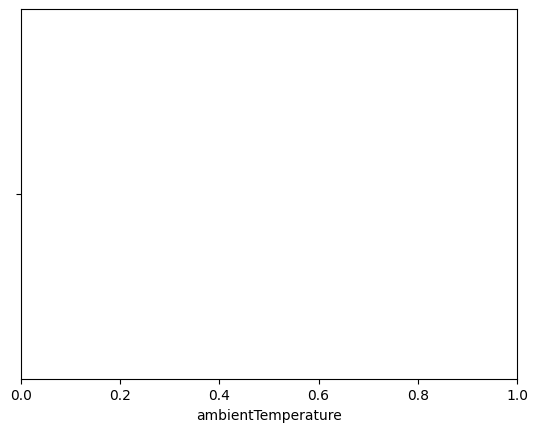

In [ ]:
# Violin Plots
for k in df:
  if df.dtypes[k] != 'object':
    ax = plt.subplot()
    sns.violinplot(df, x = k, ax = ax)
    plt.show()

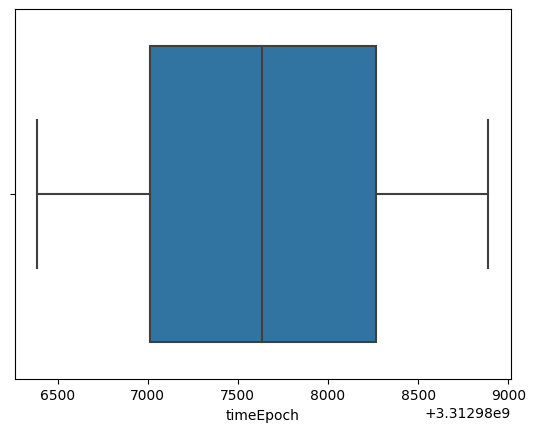

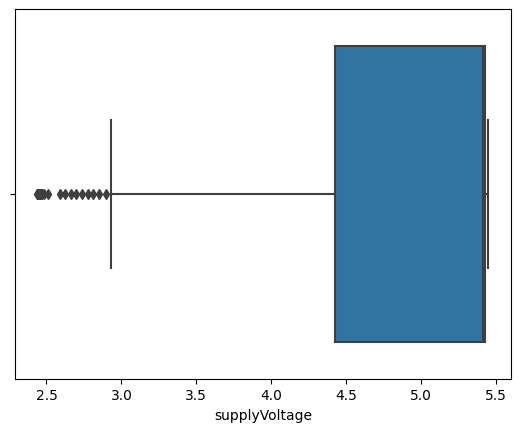

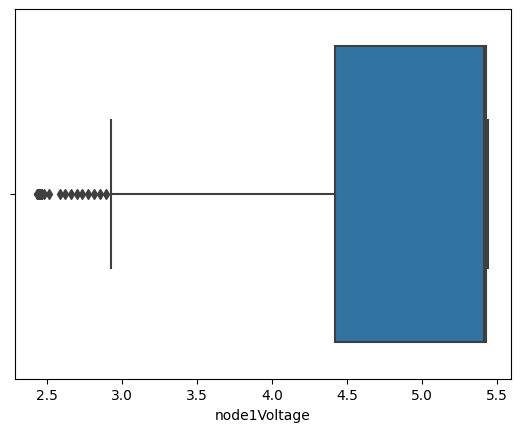

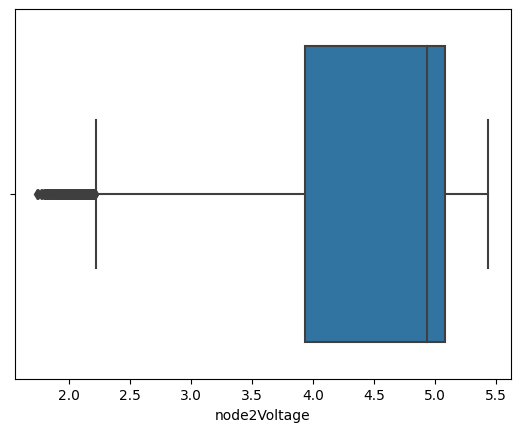

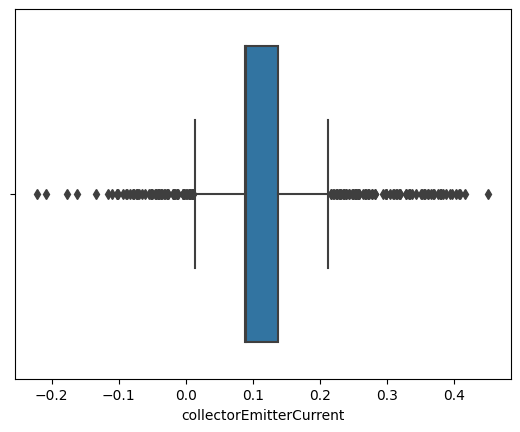

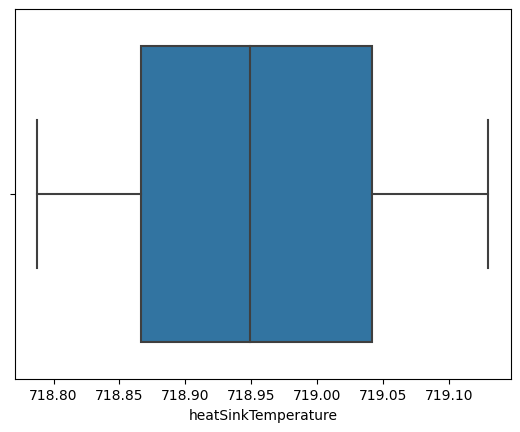

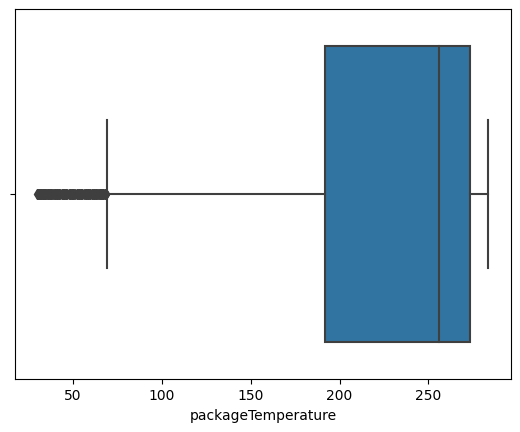

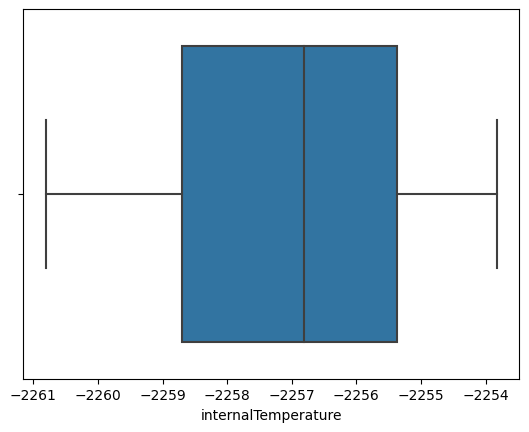

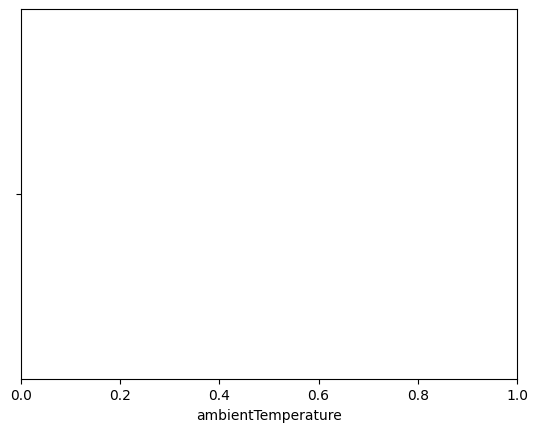

In [ ]:
# Box Plots
for k in df:
  if df.dtypes[k] != 'object':
    ax = plt.subplot()
    sns.boxplot(df, x = k, ax = ax)
    plt.show()

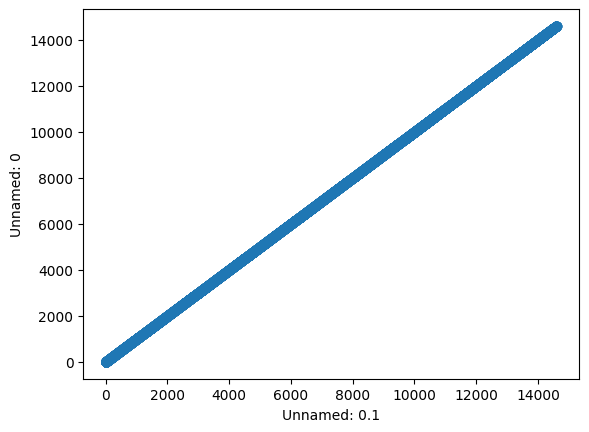

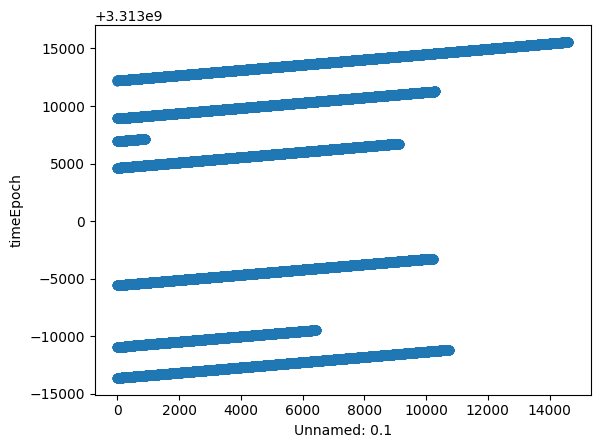

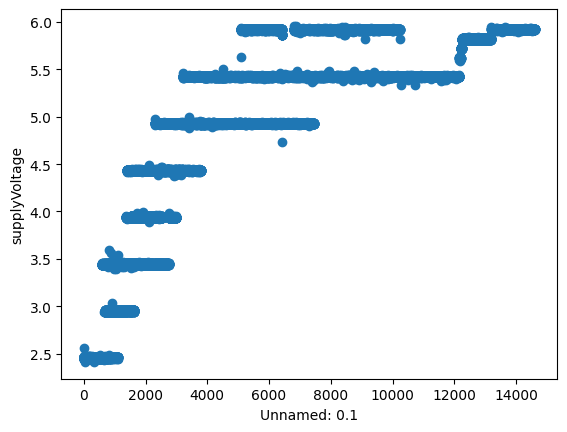

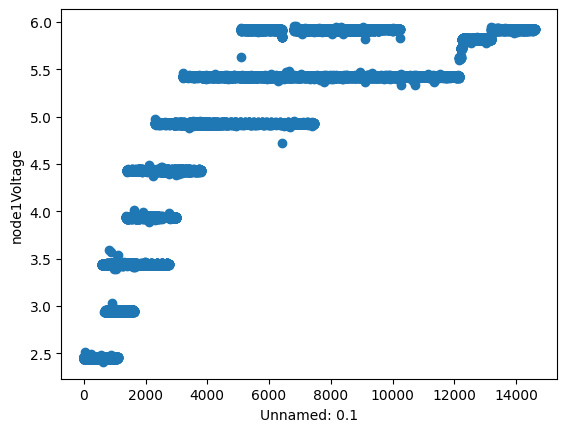

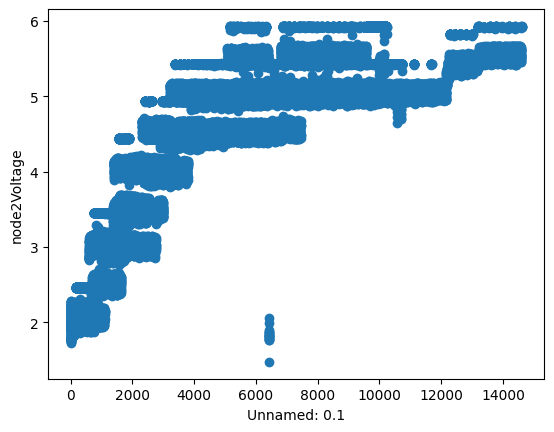

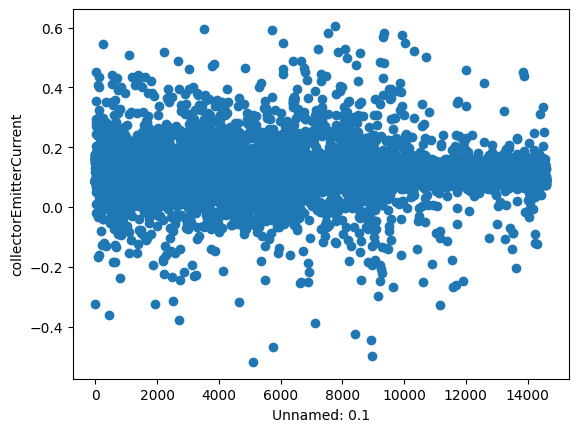

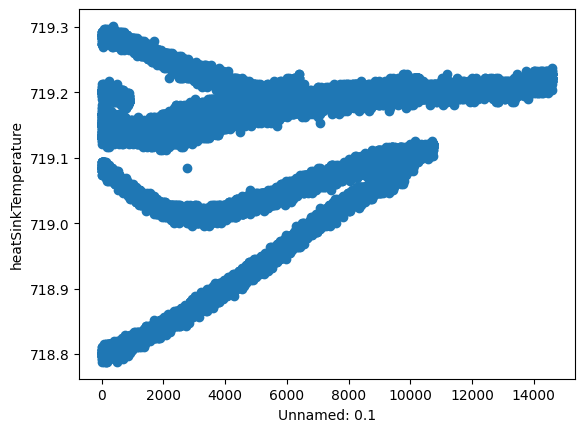

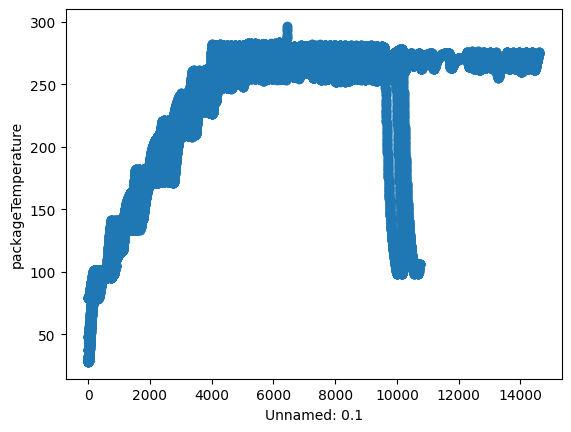

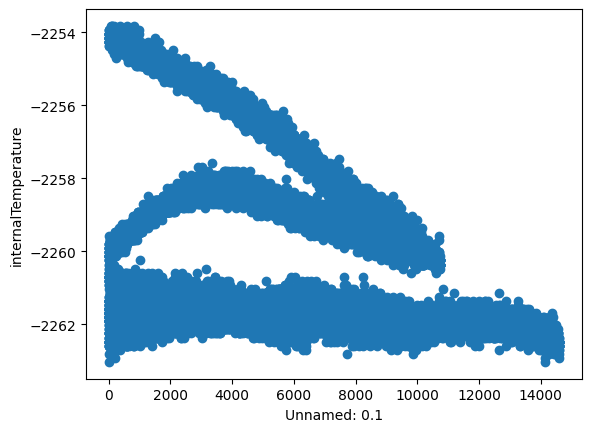

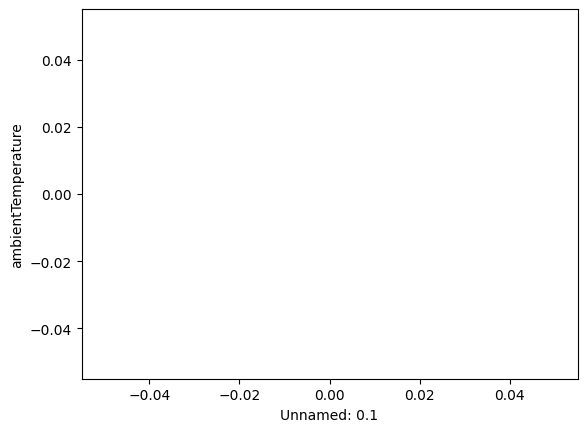

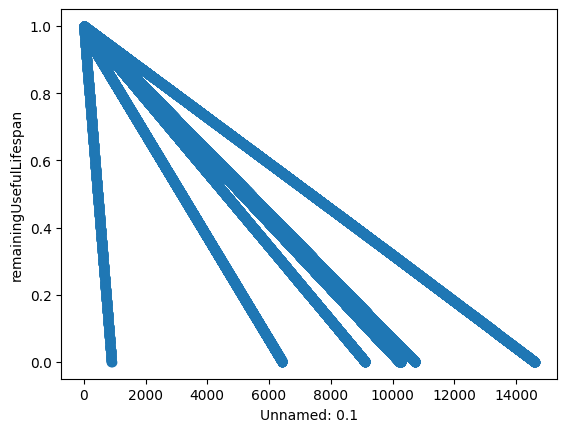

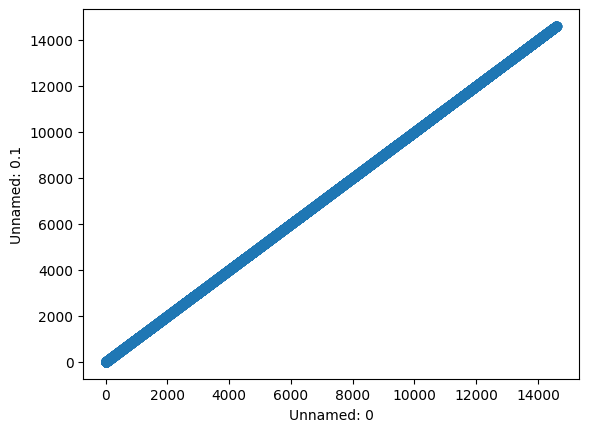

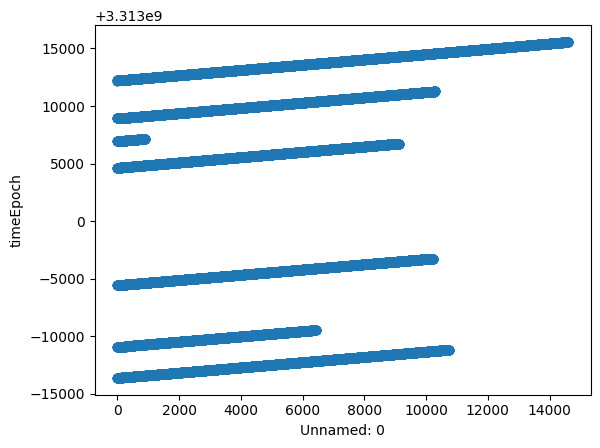

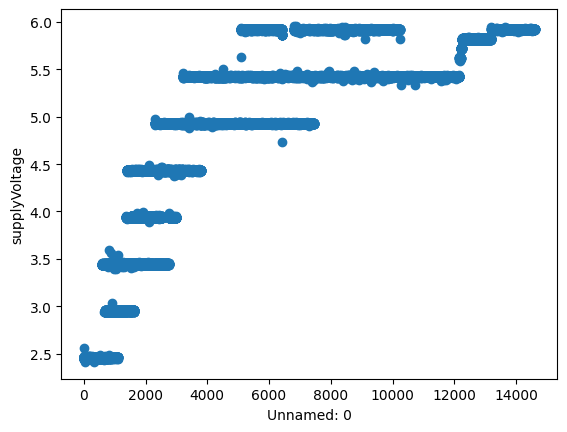

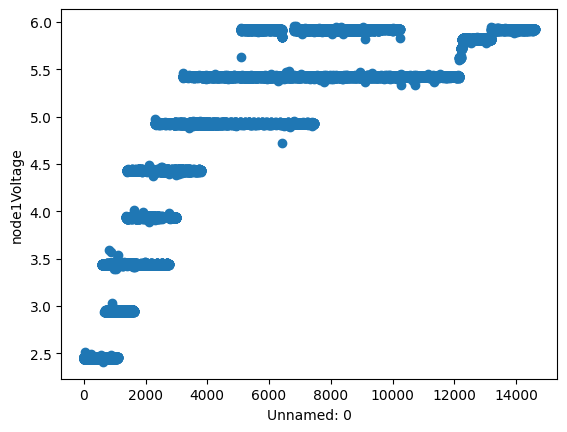

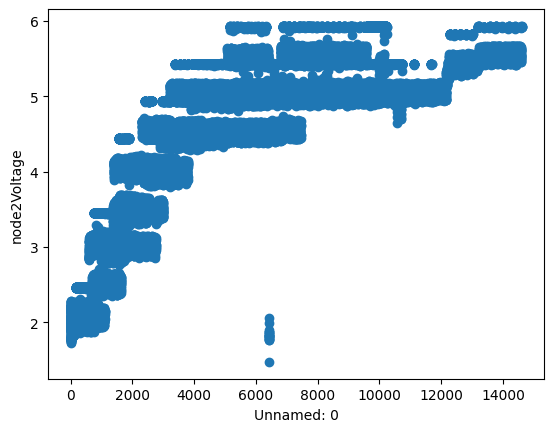

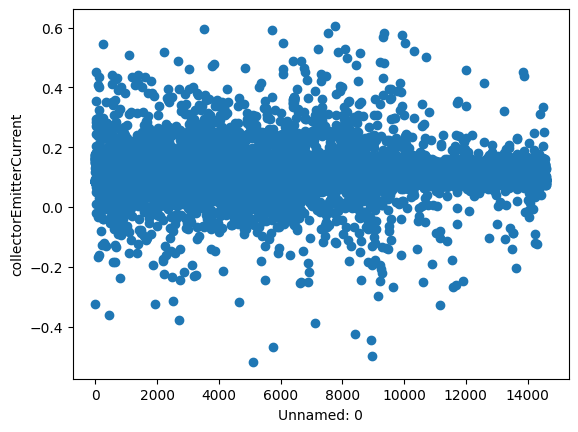

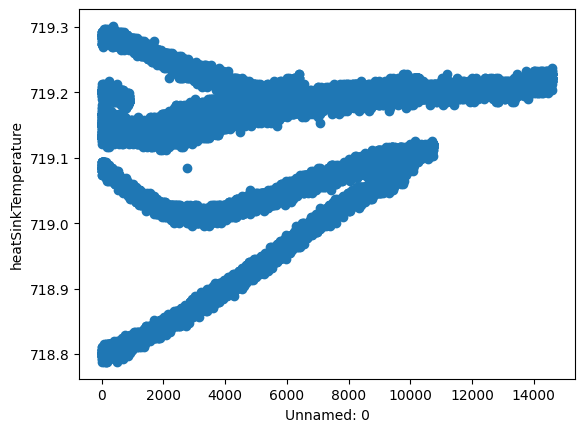

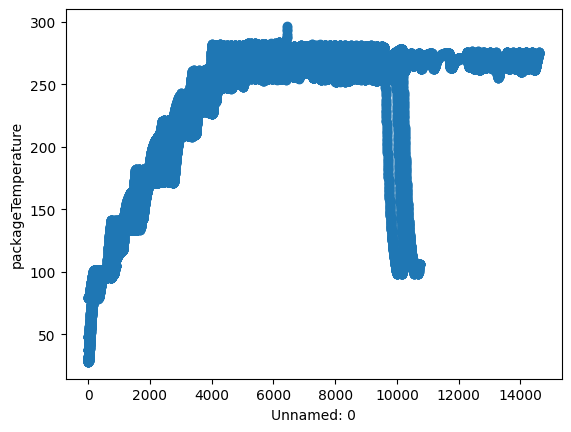

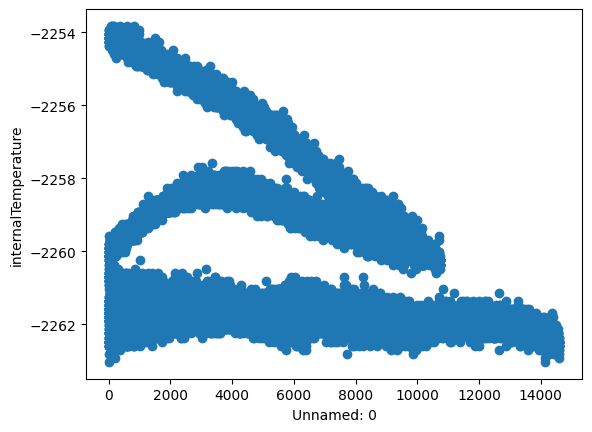

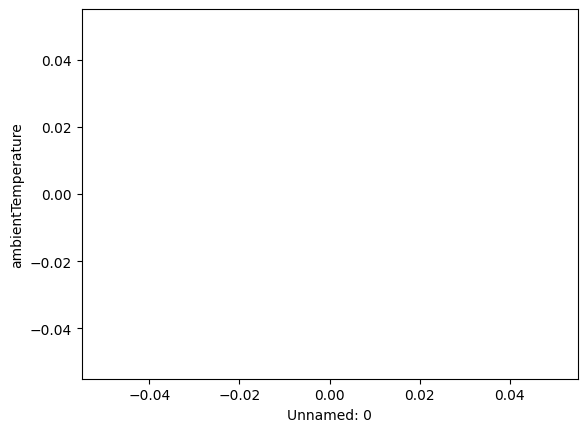

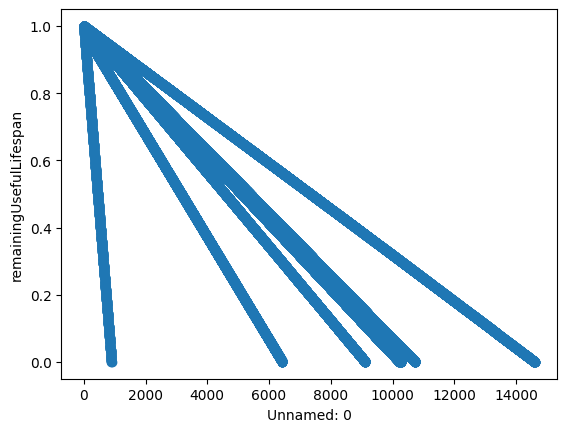

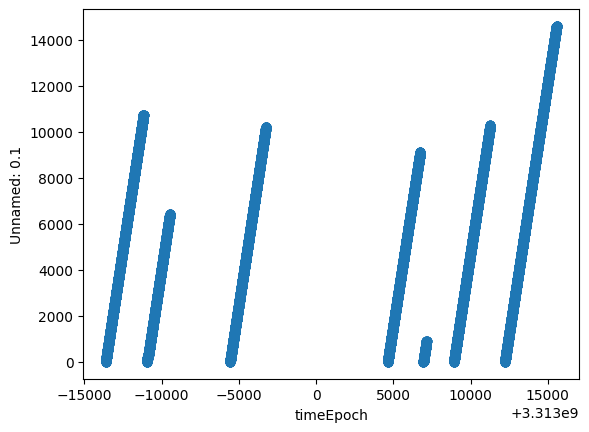

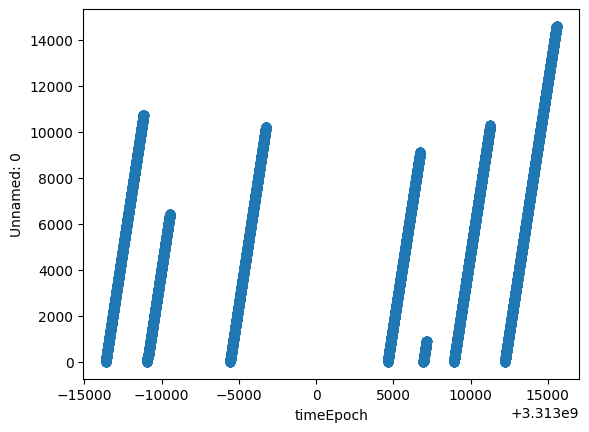

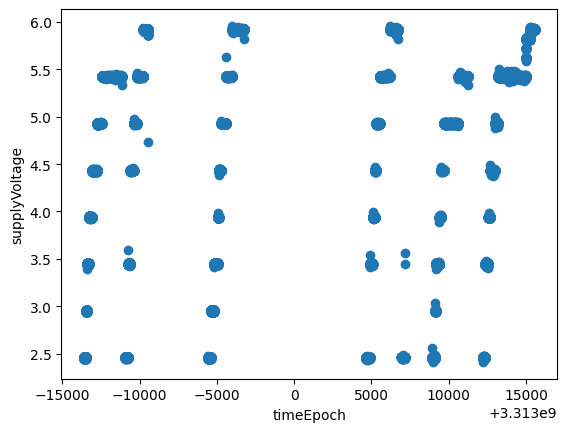

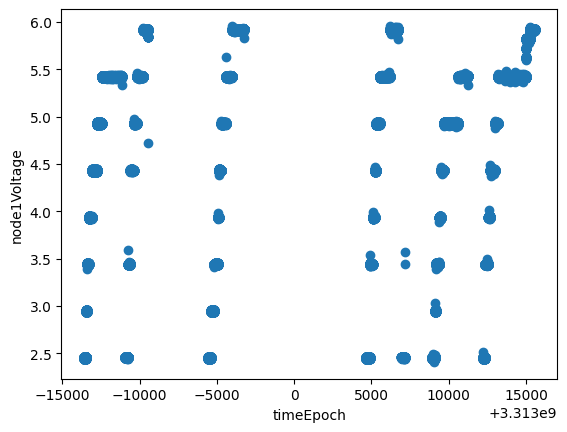

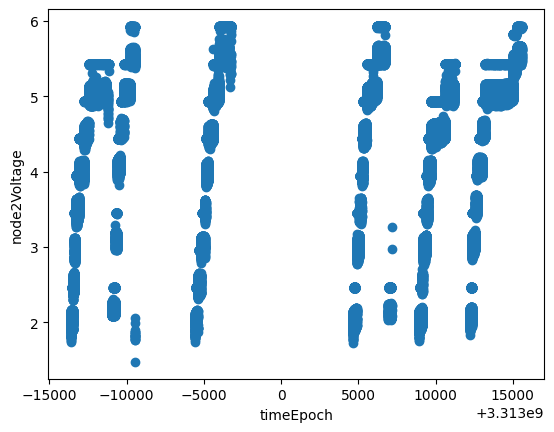

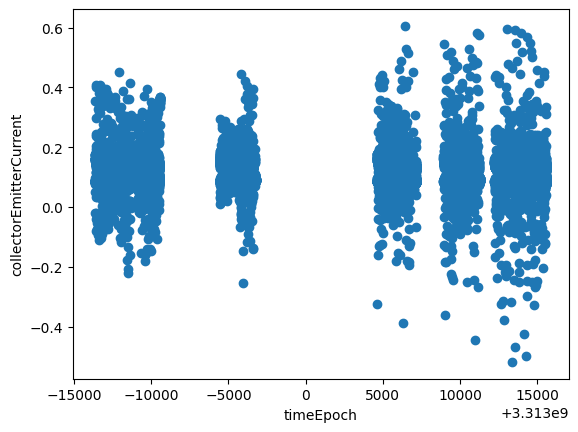

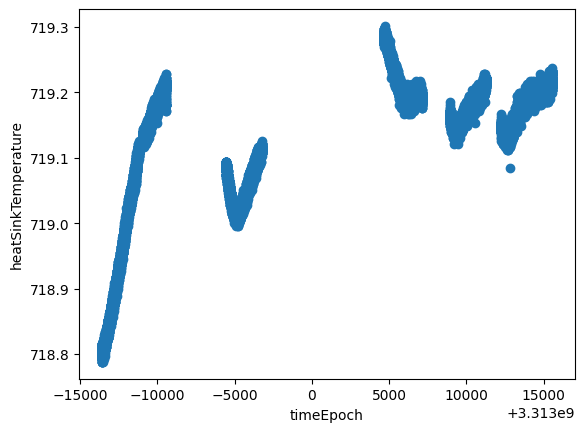

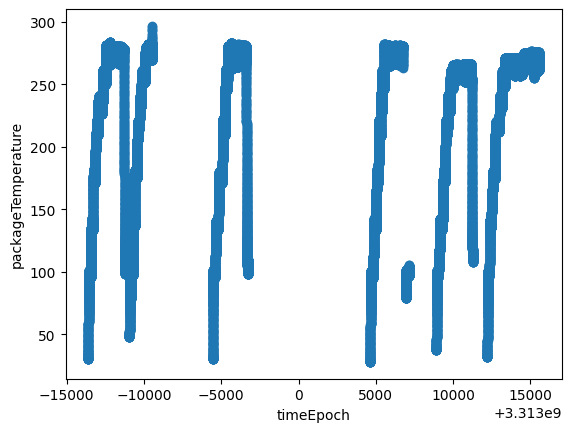

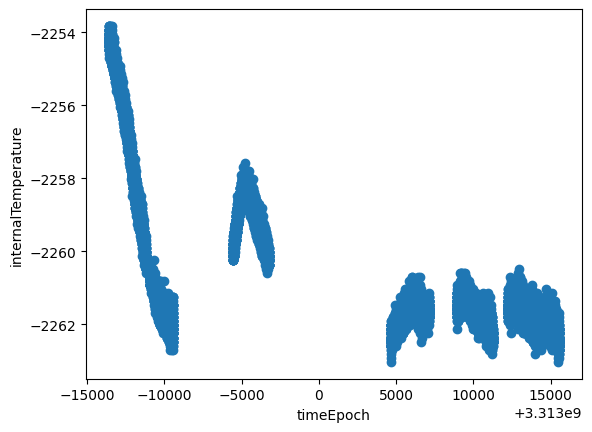

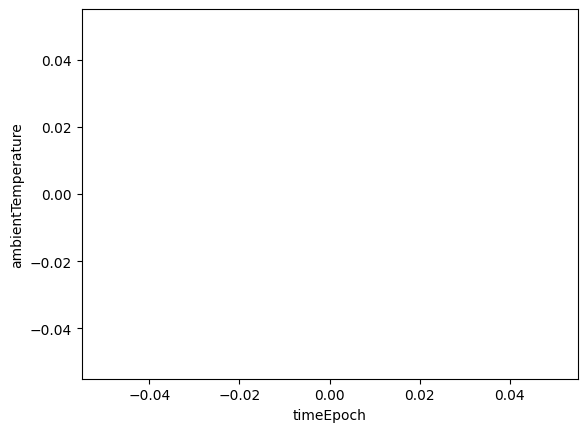

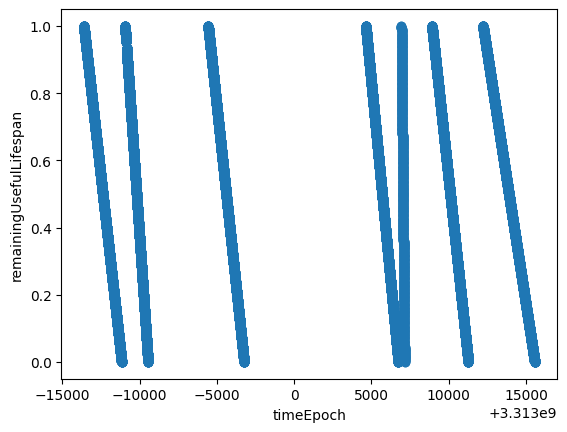

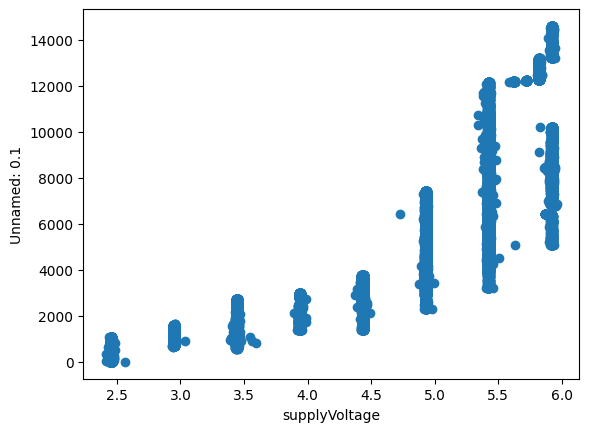

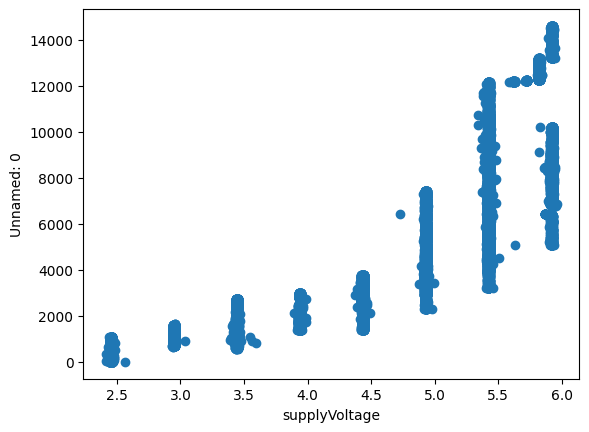

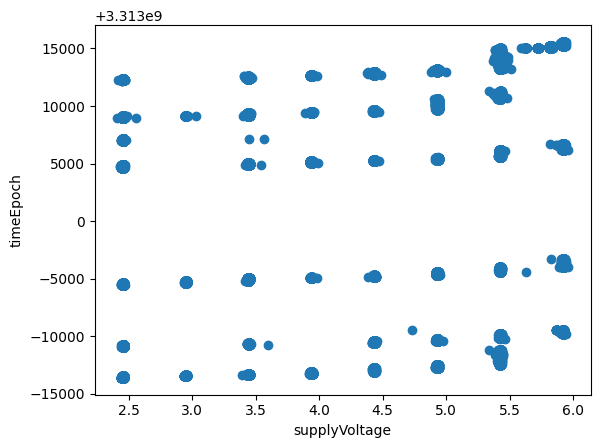

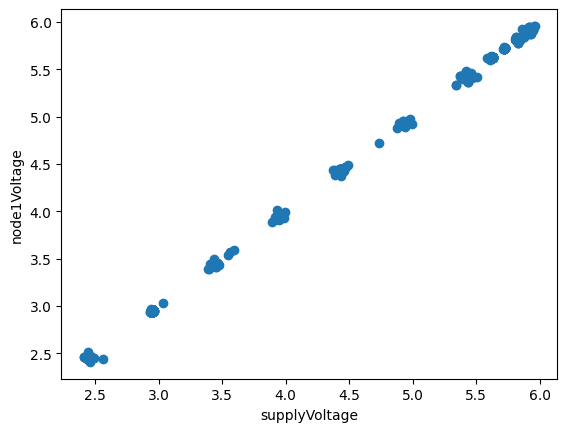

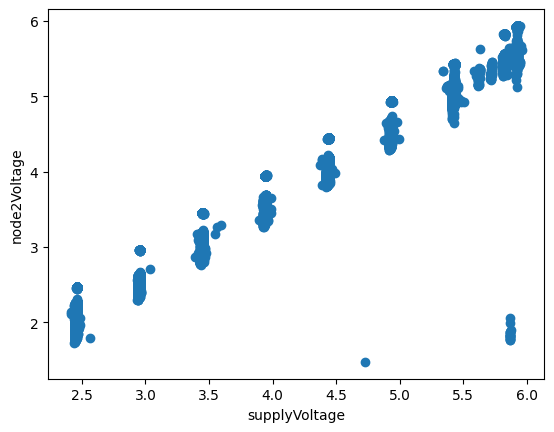

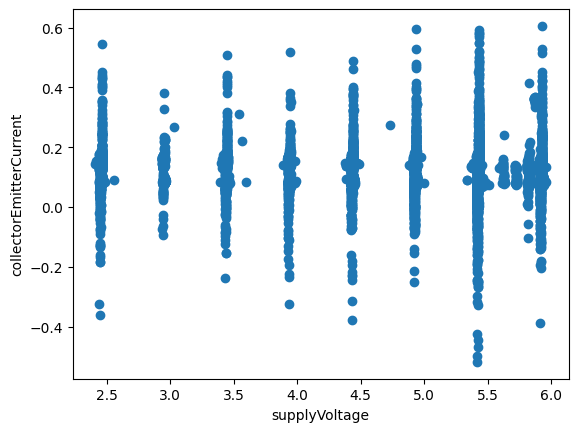

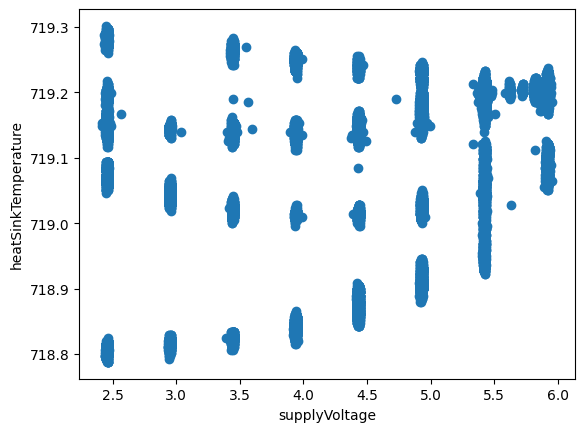

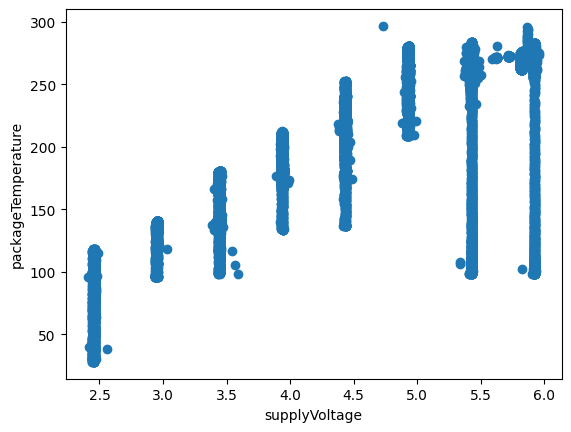

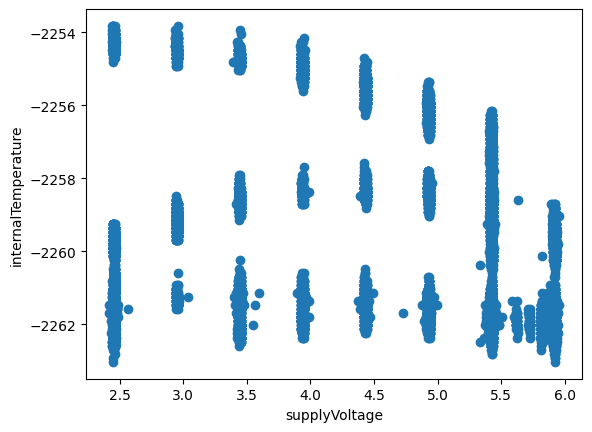

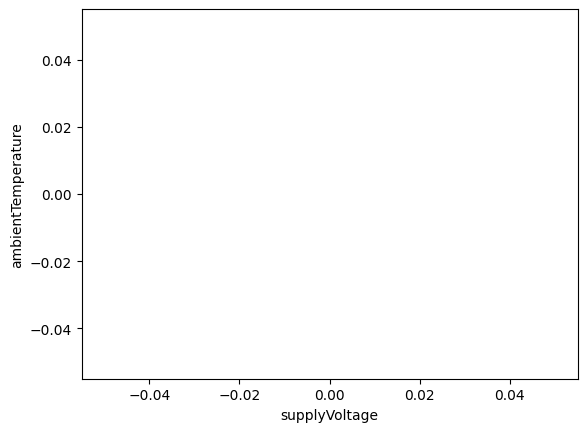

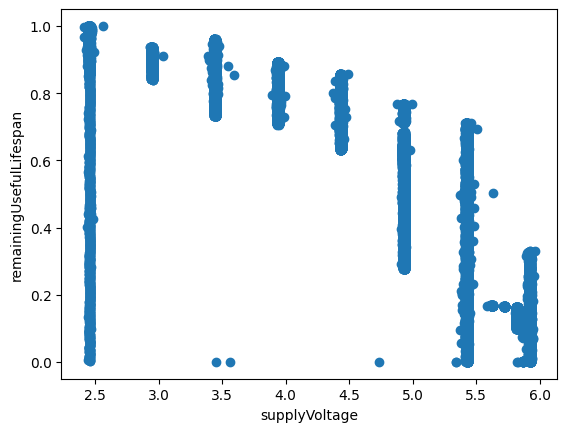

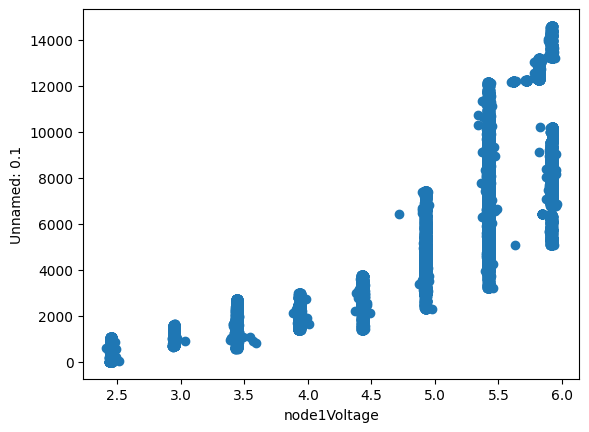

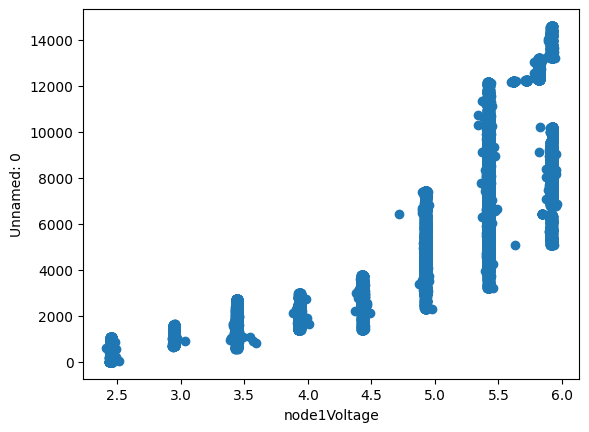

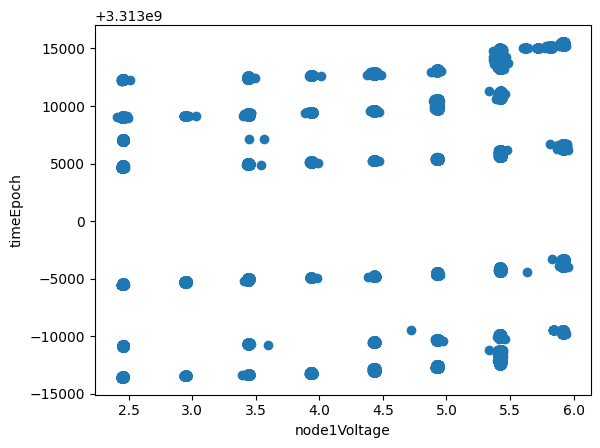

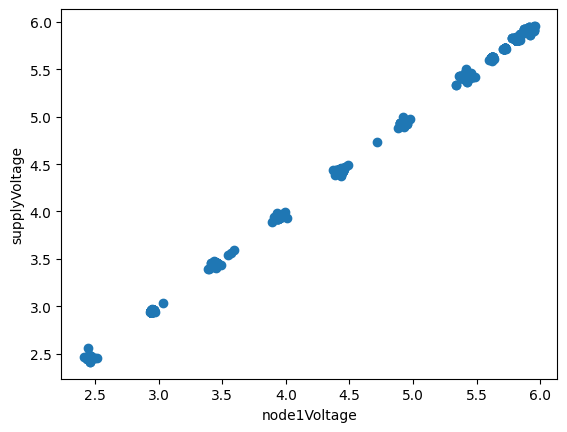

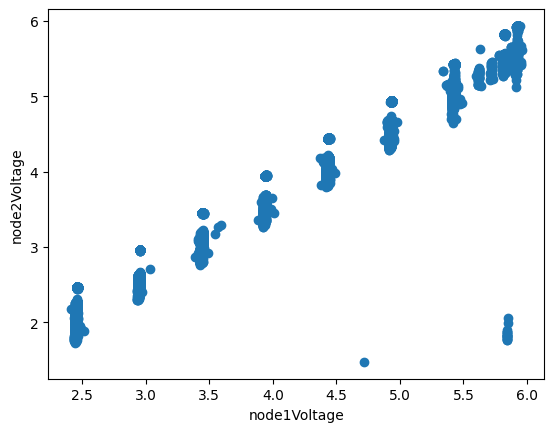

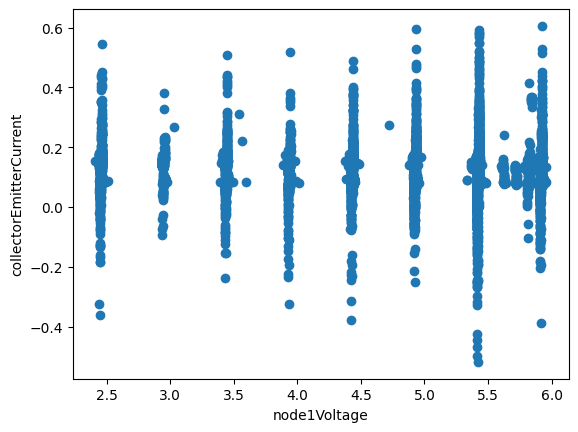

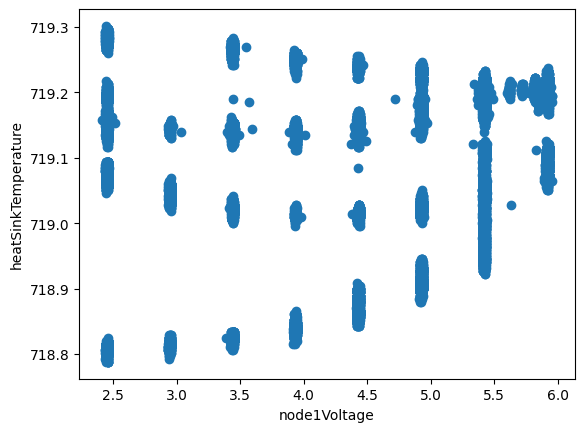

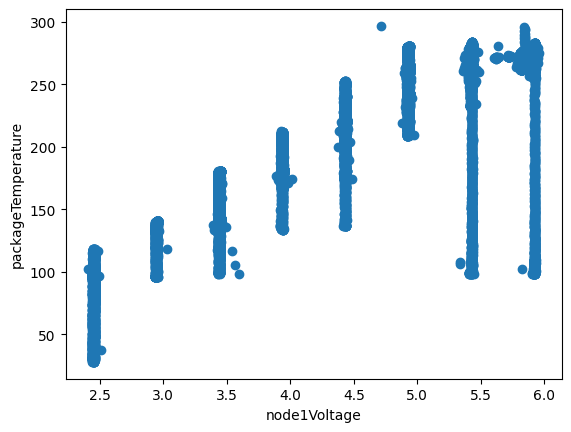

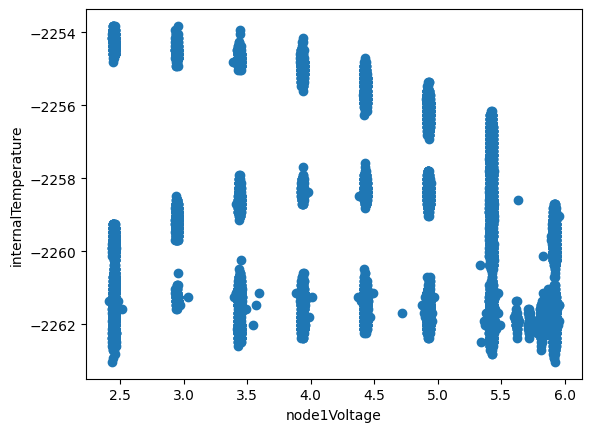

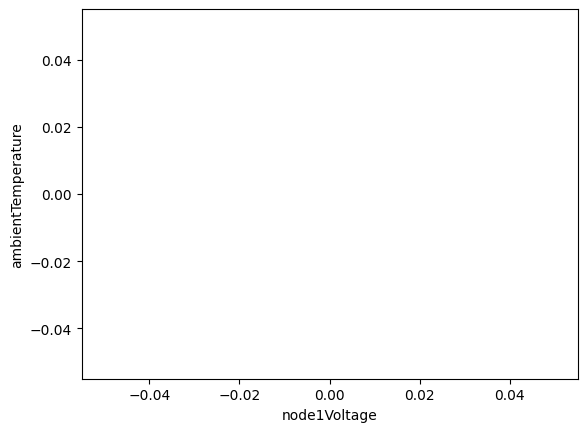

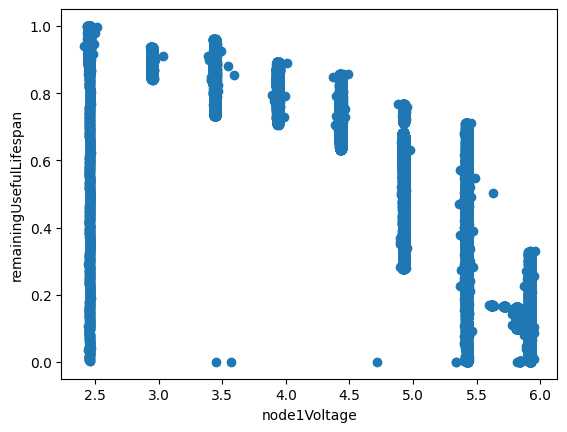

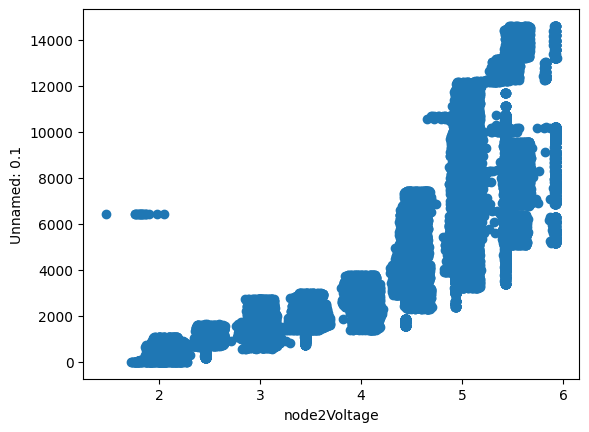

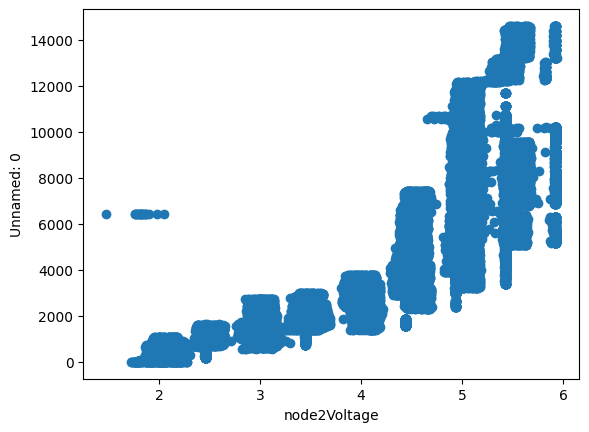

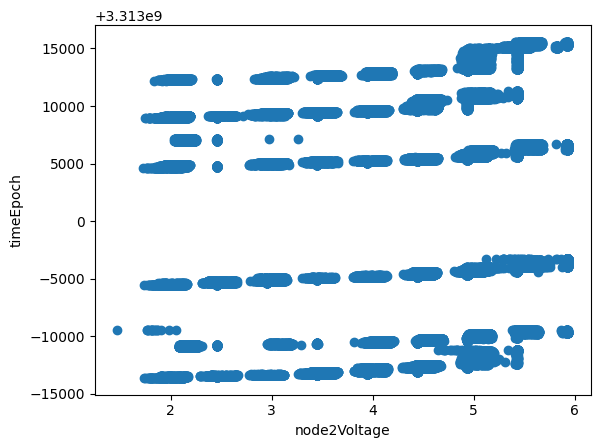

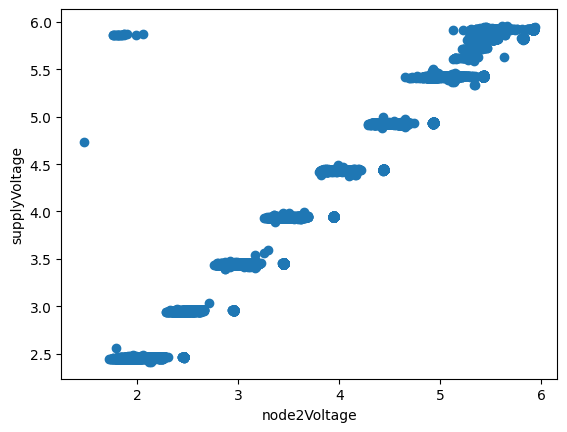

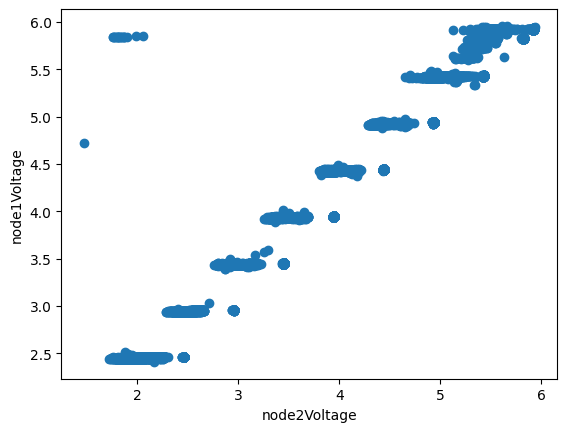

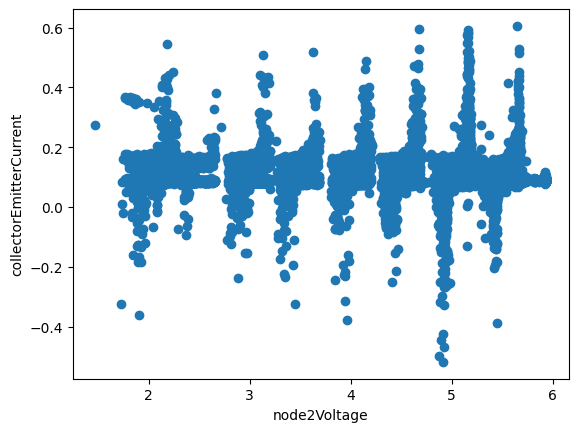

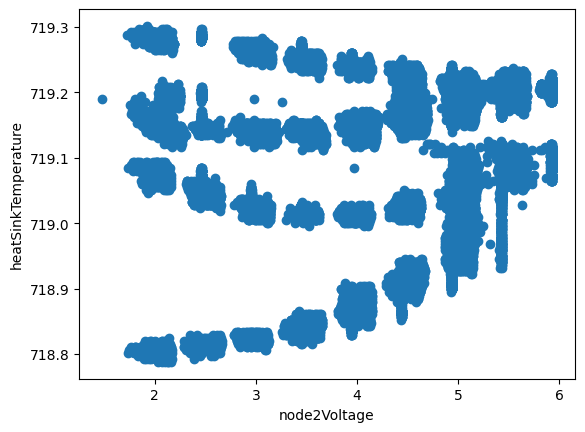

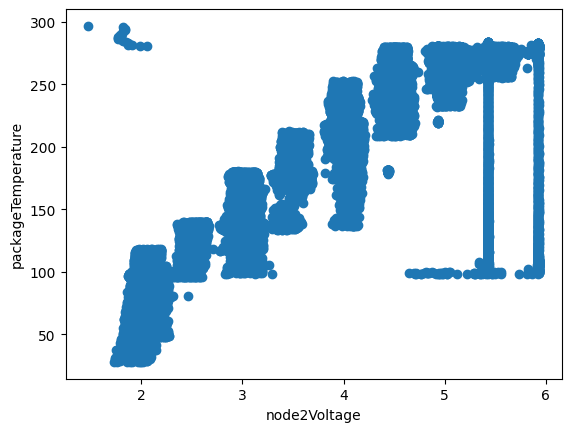

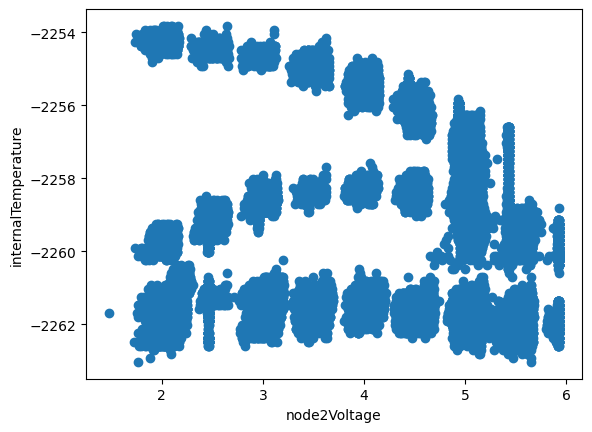

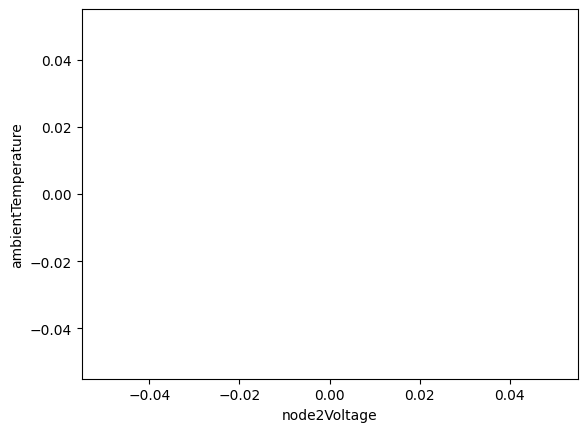

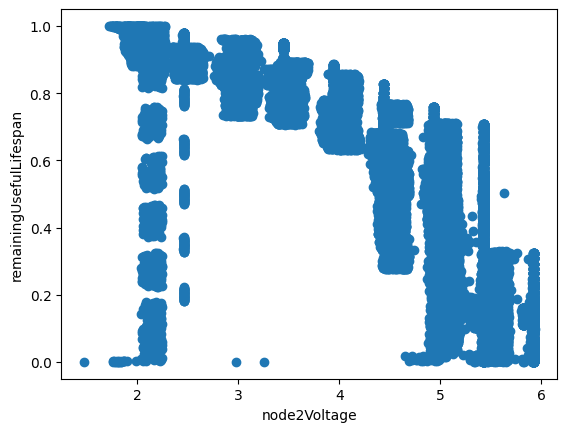

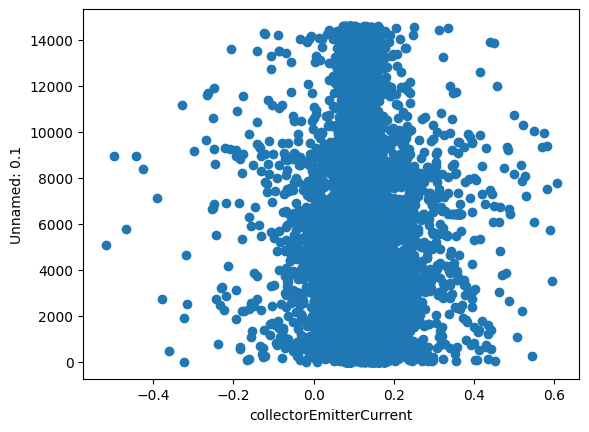

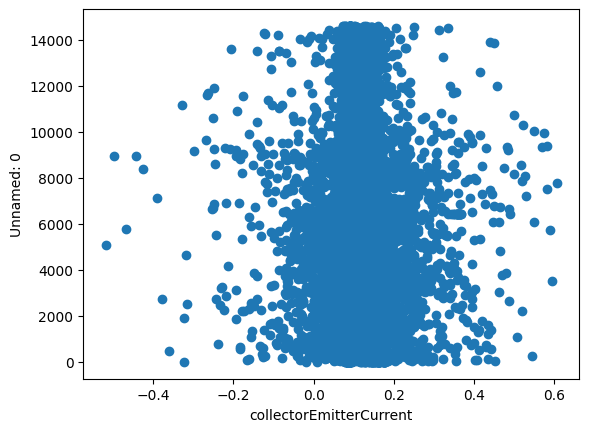

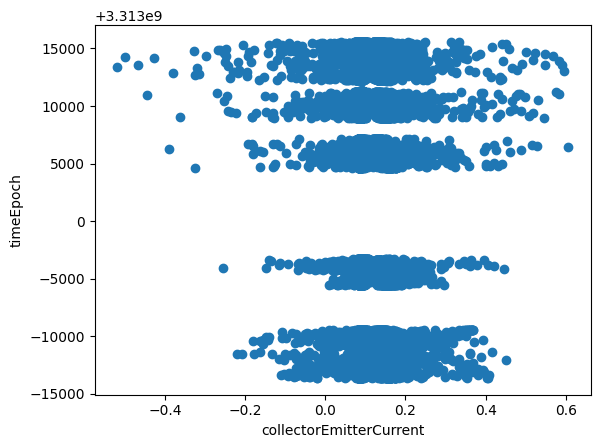

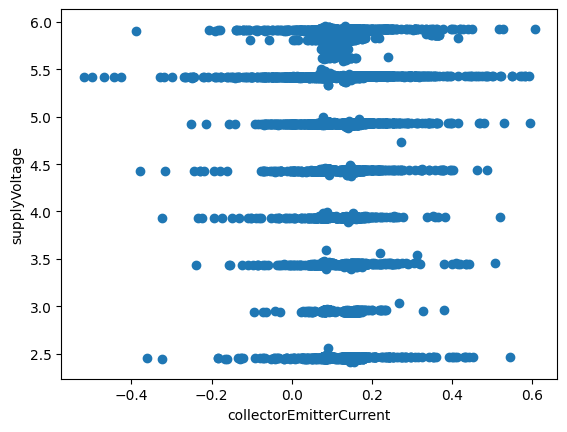

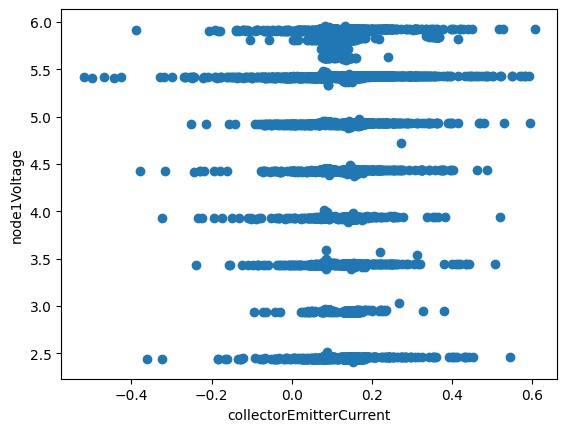

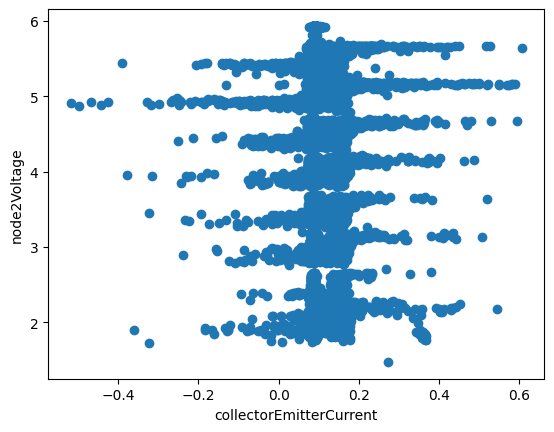

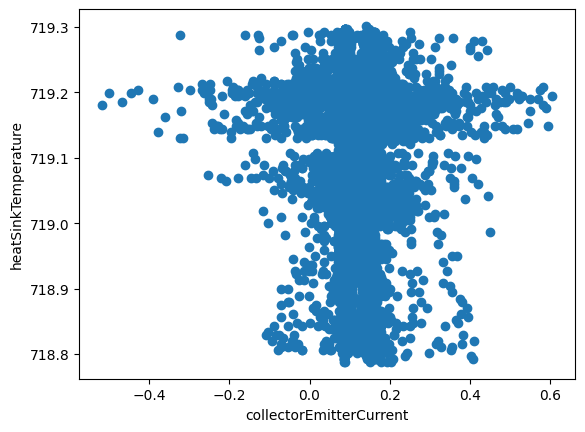

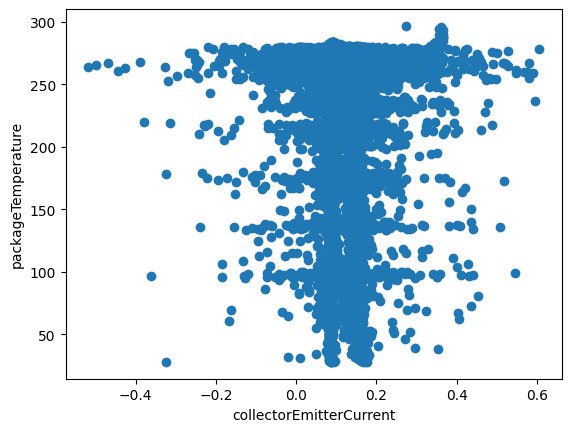

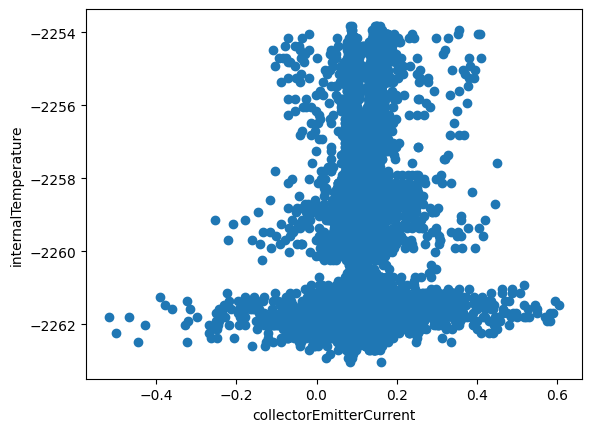

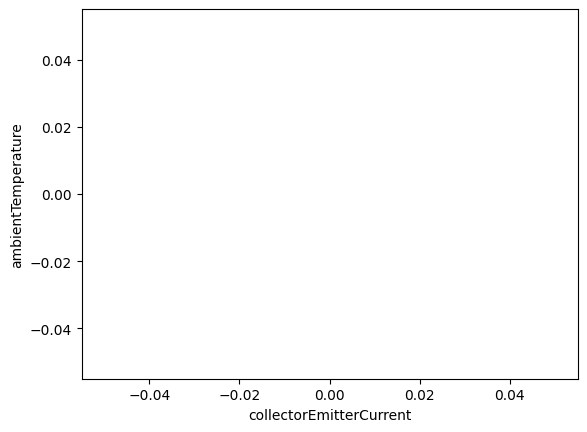

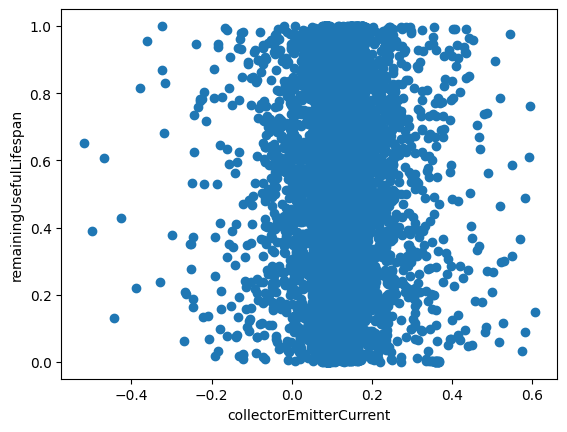

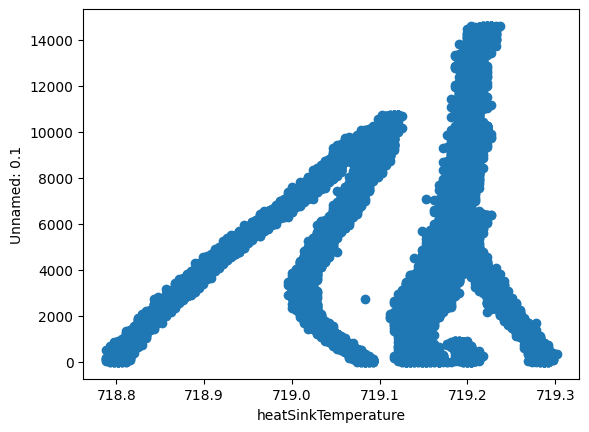

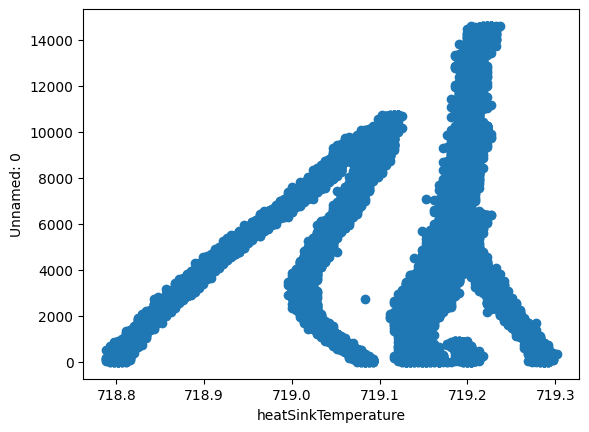

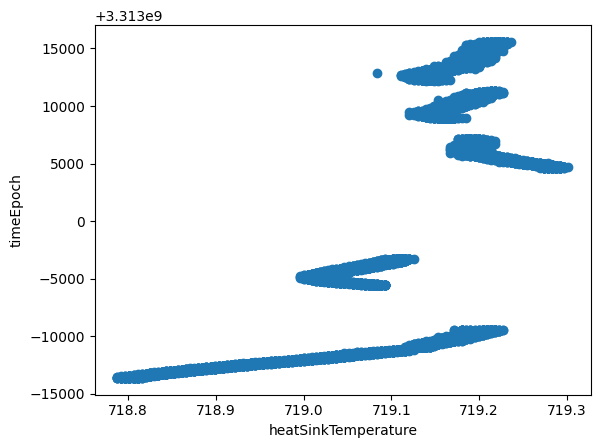

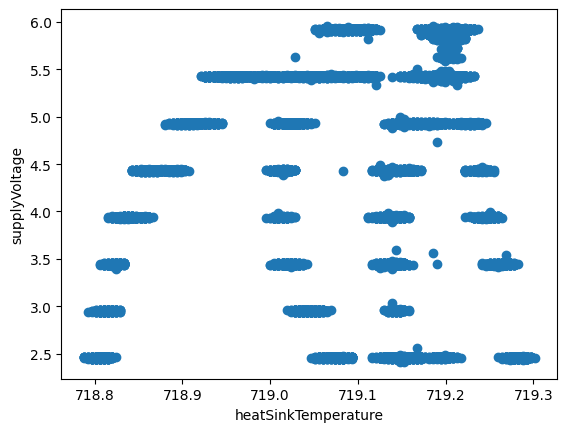

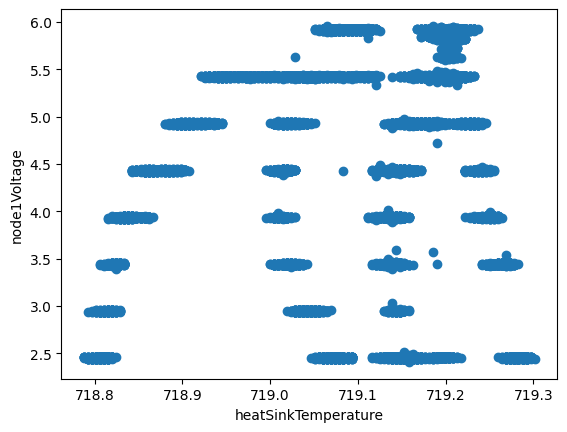

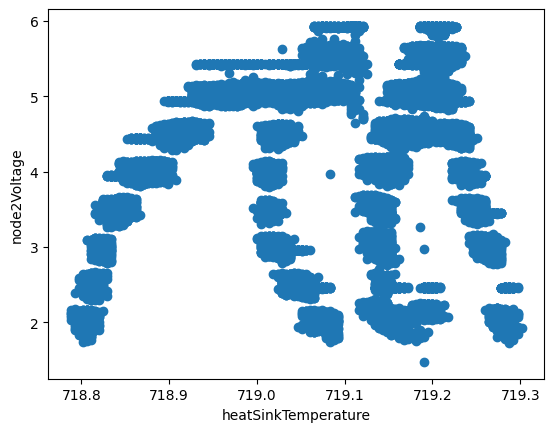

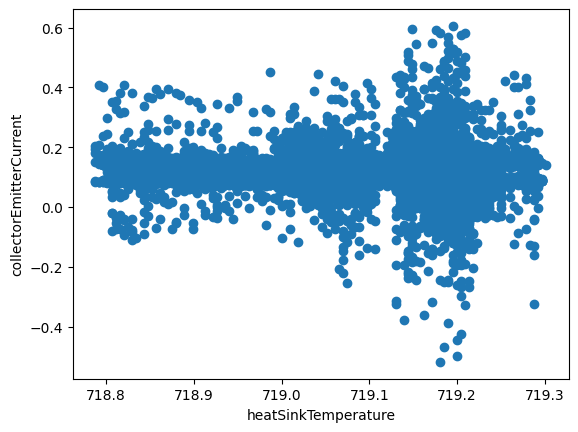

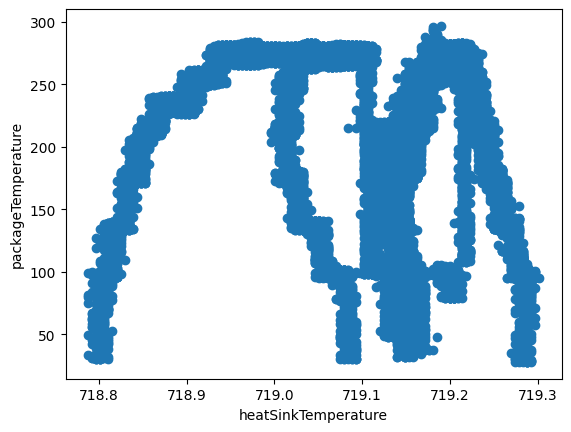

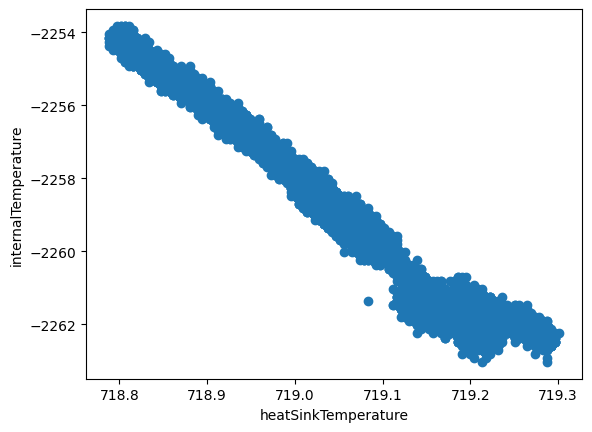

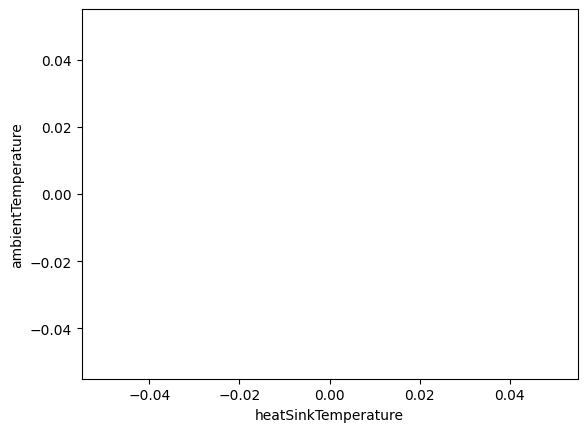

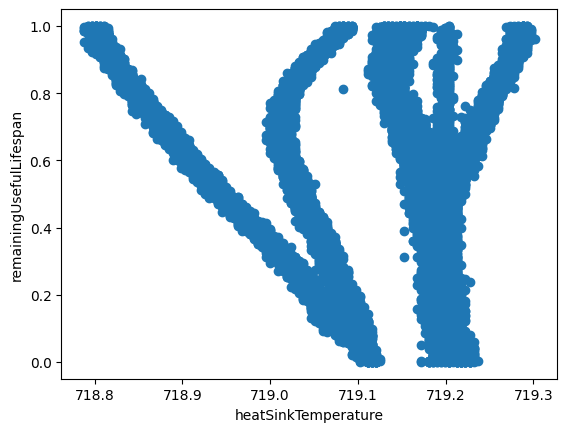

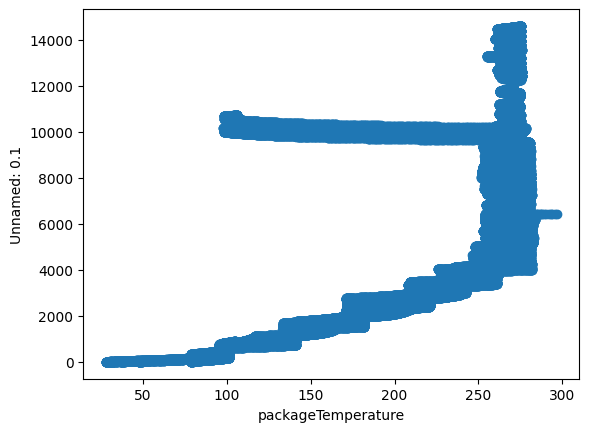

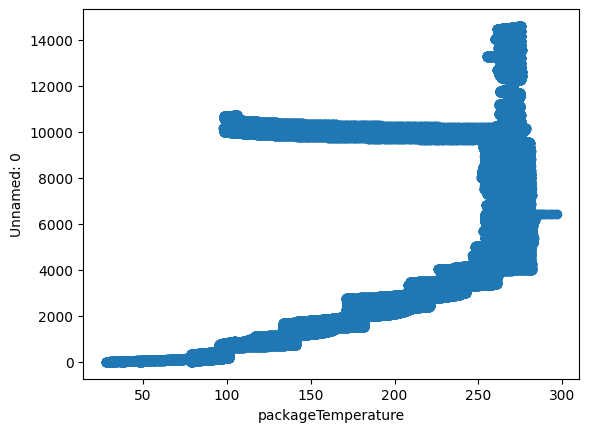

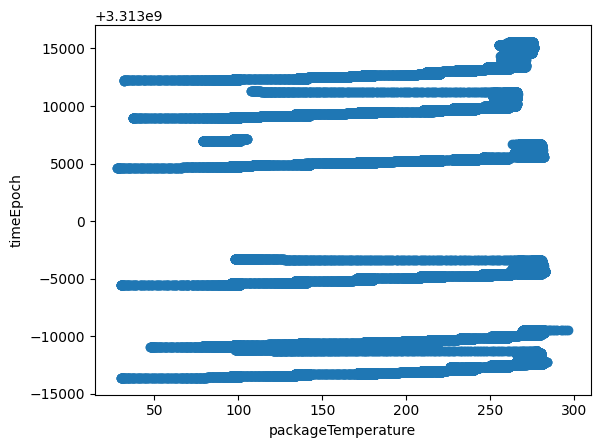

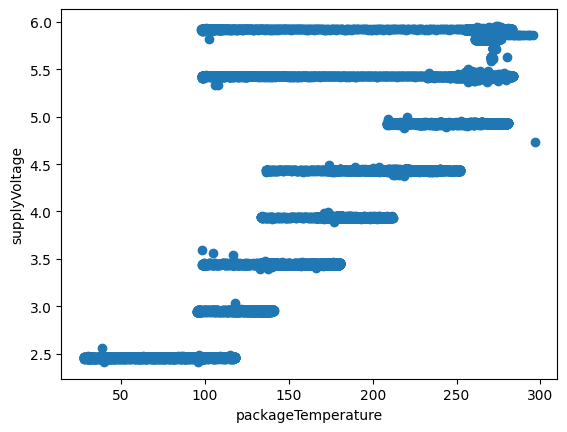

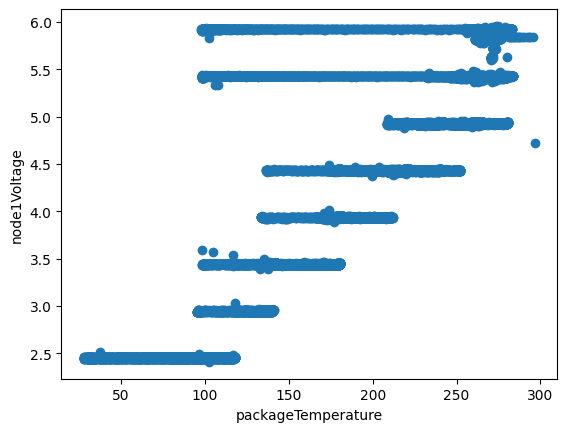

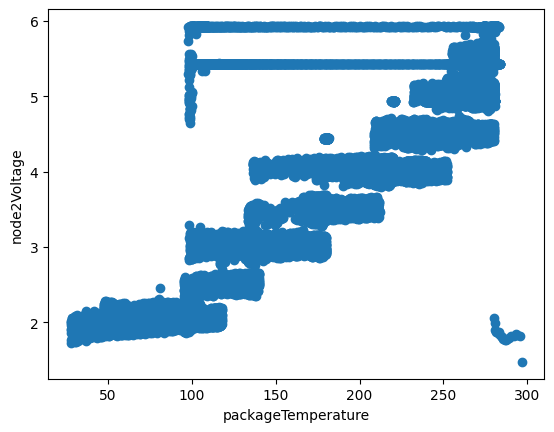

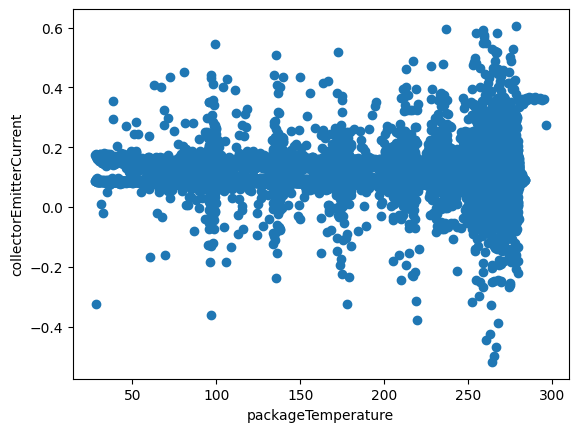

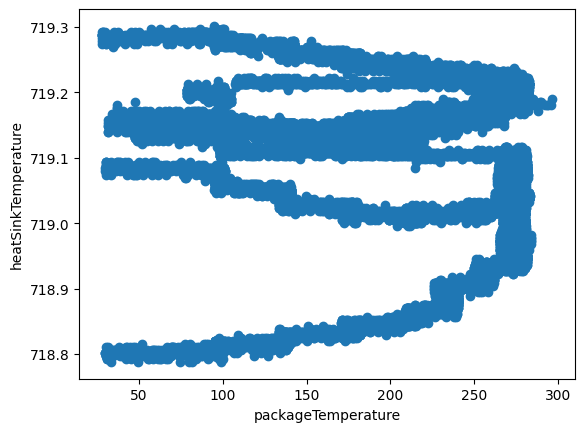

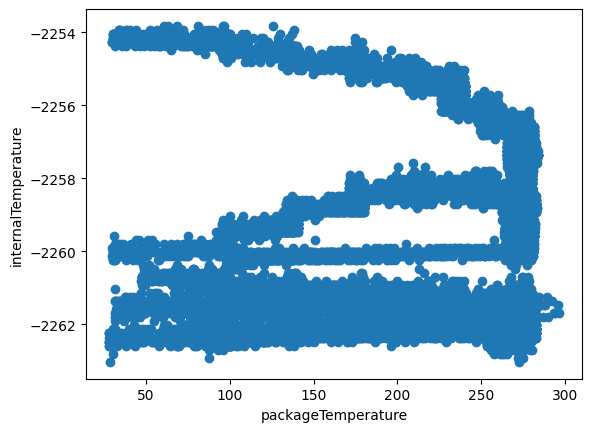

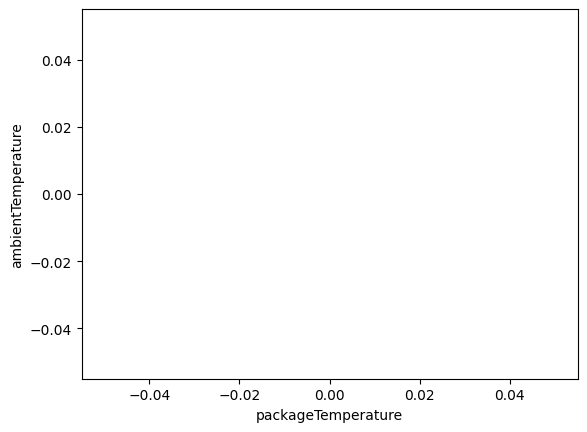

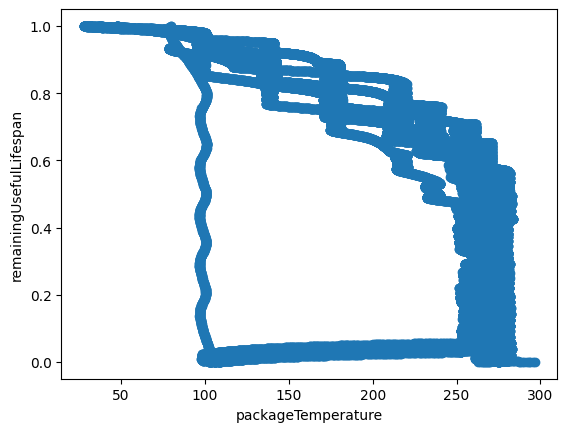

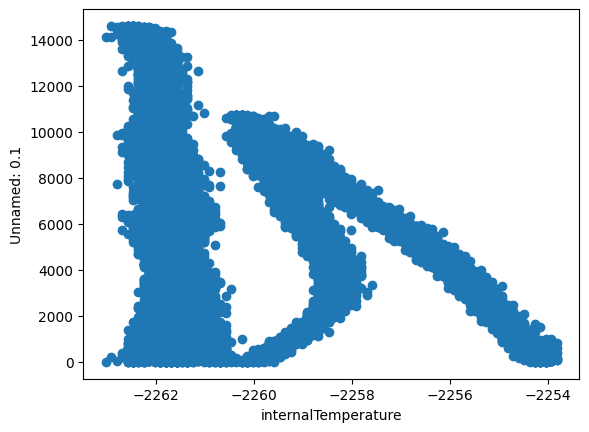

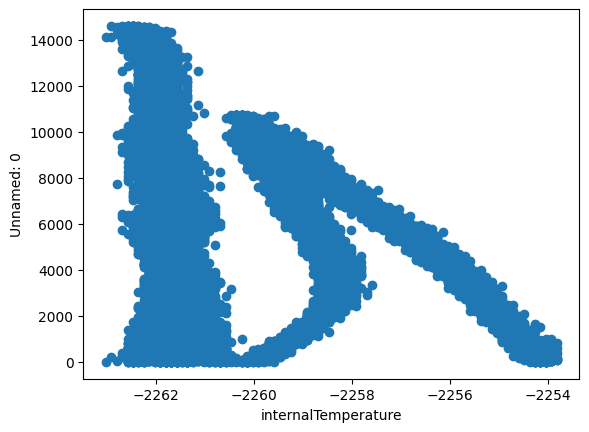

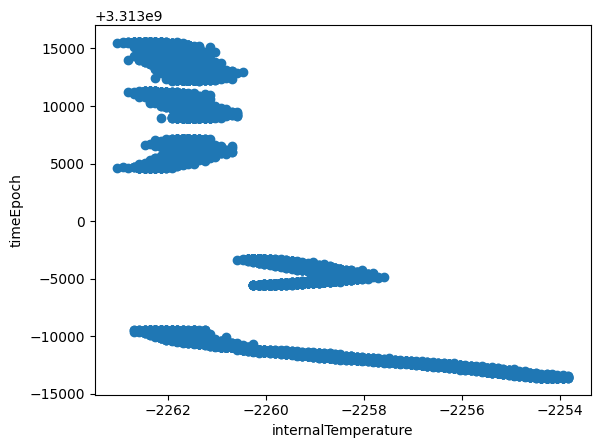

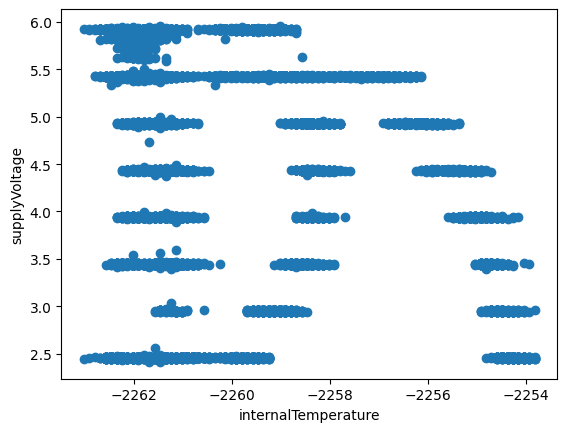

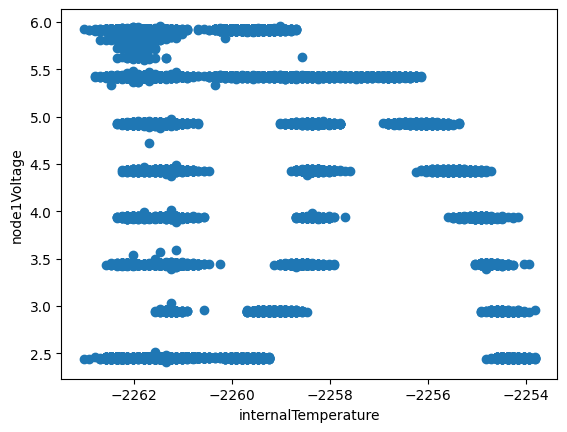

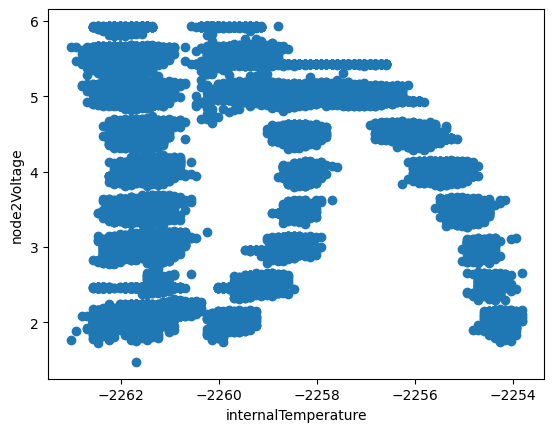

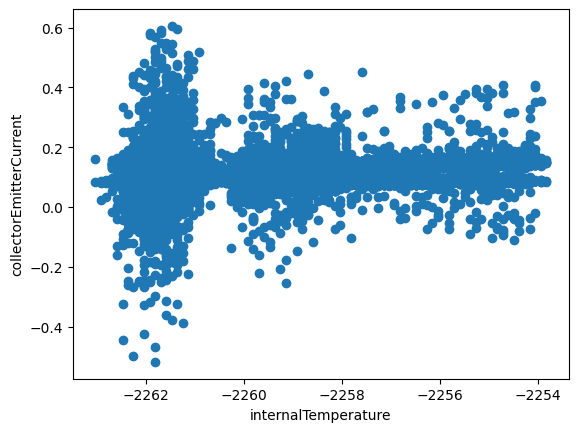

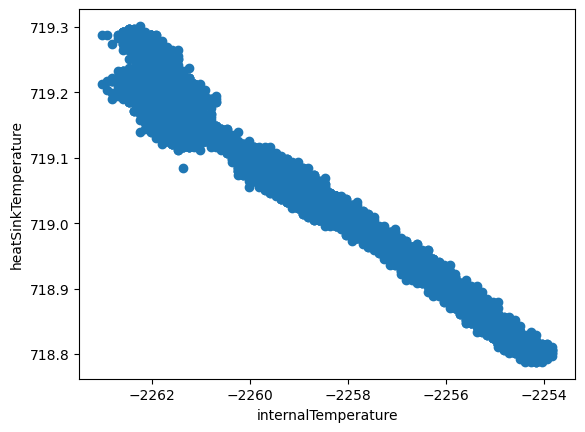

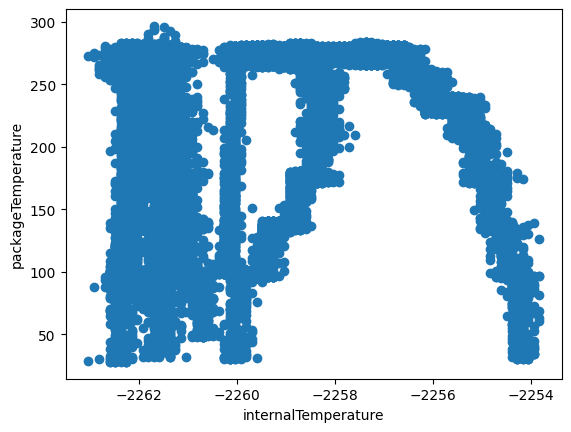

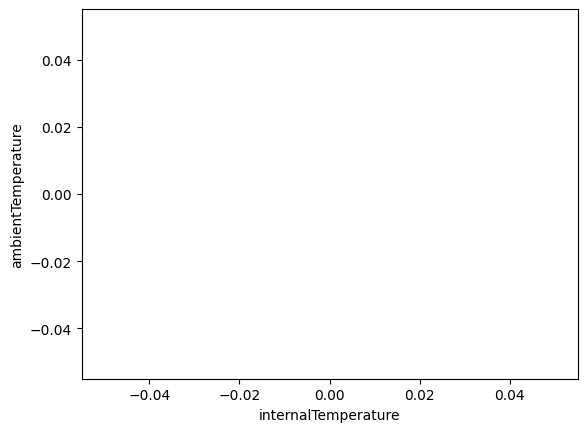

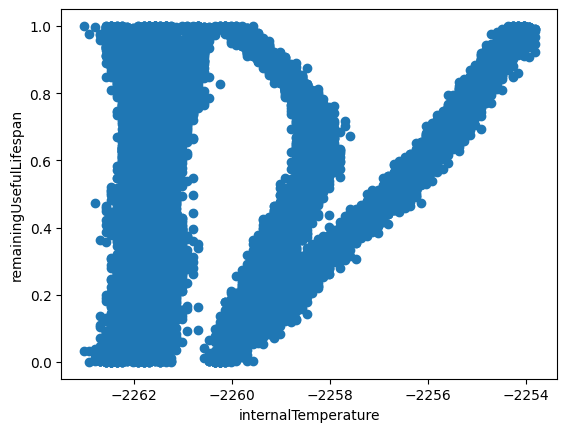

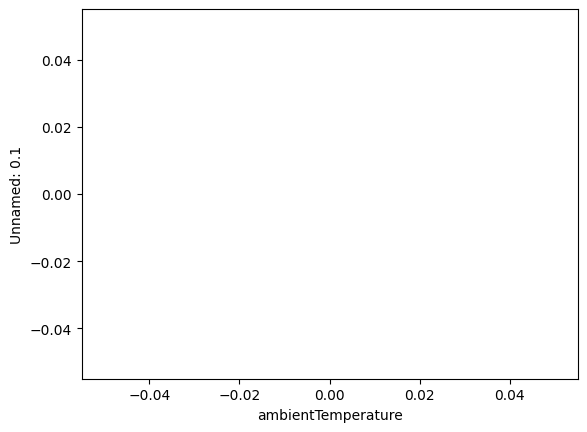

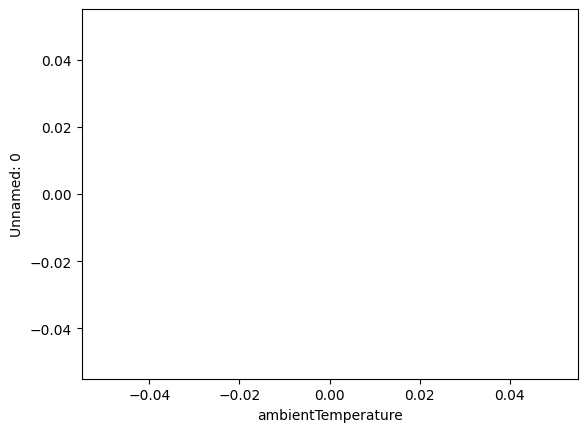

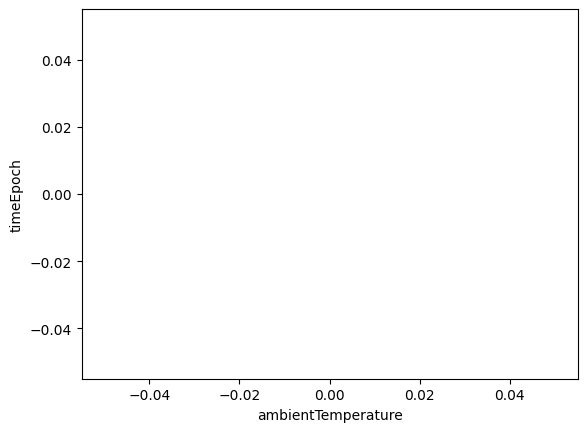

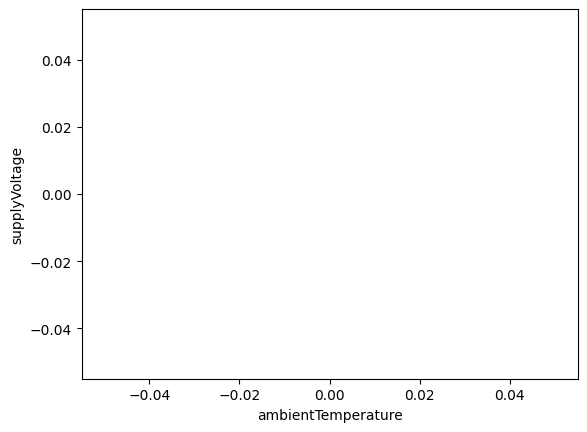

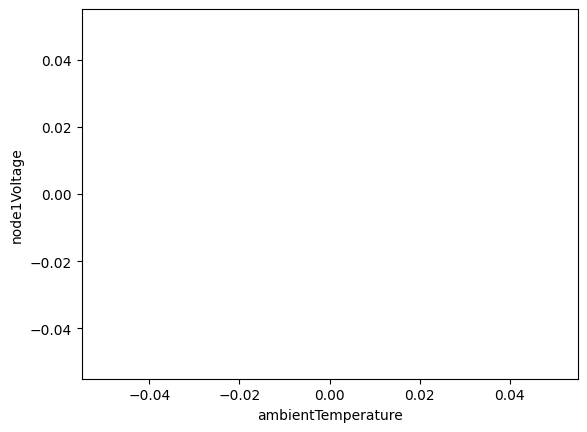

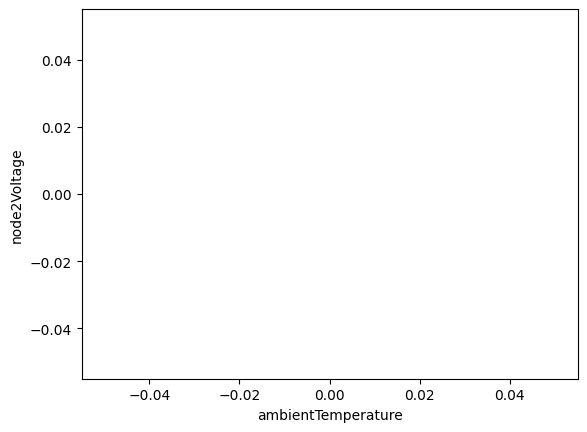

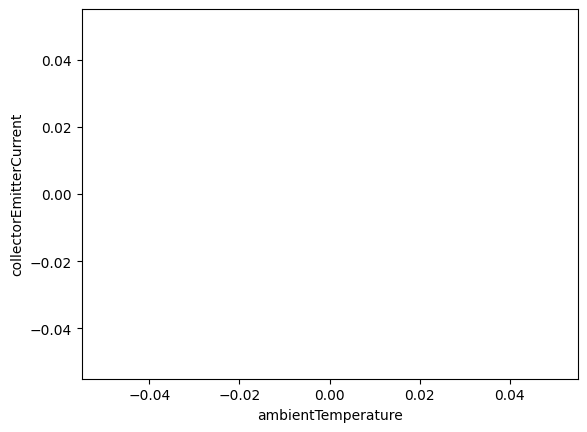

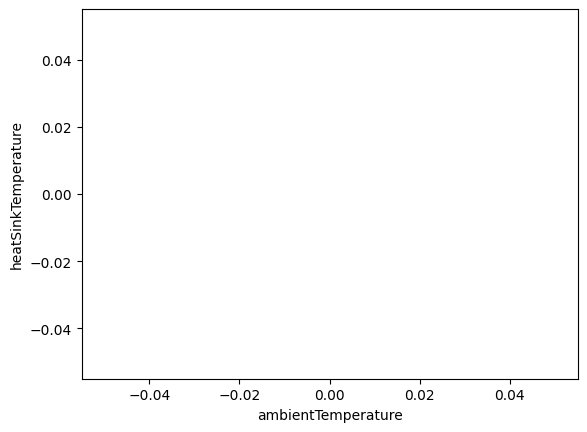

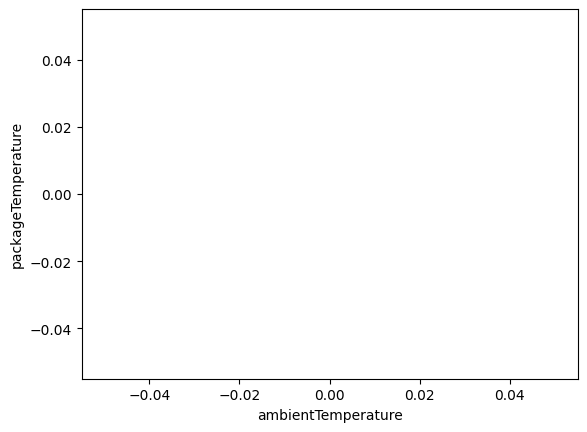

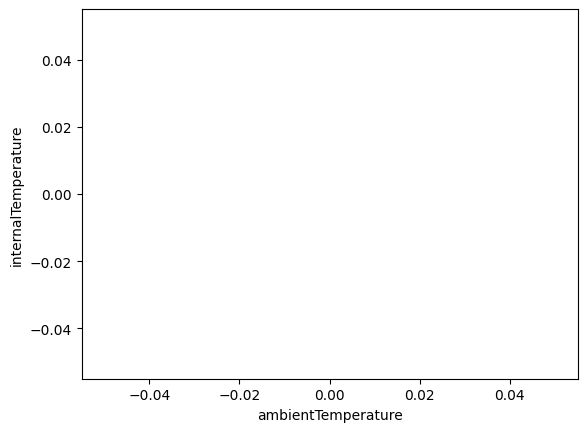

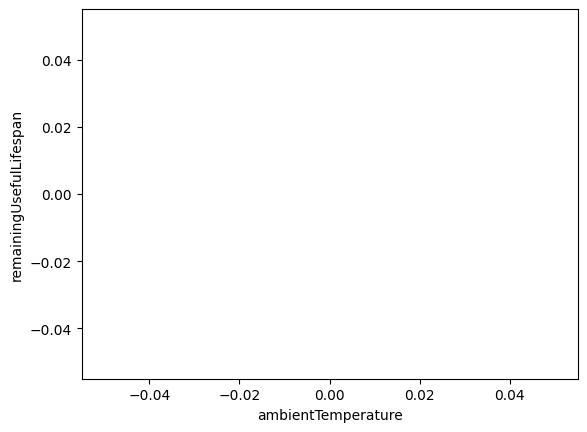

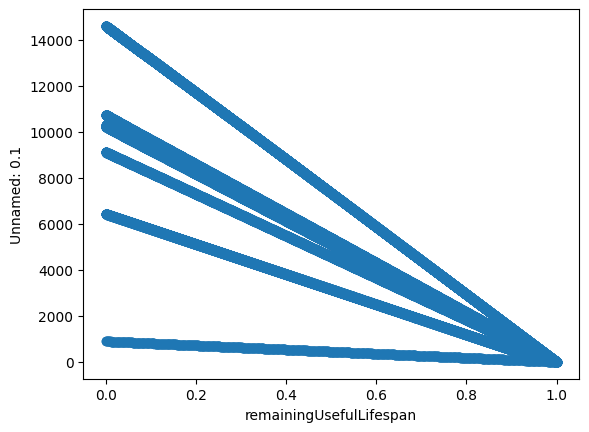

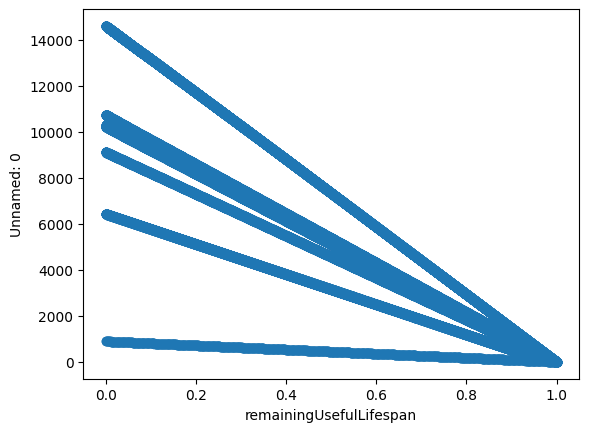

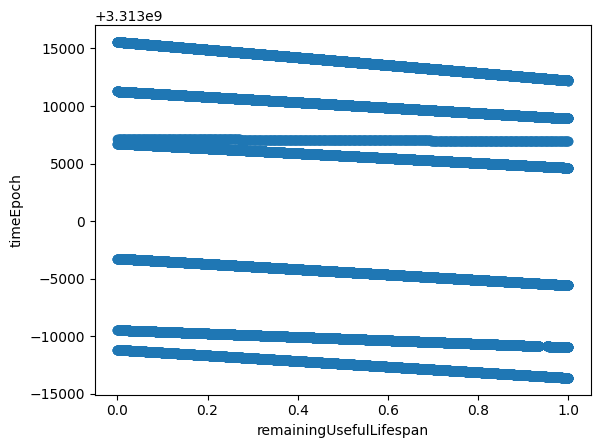

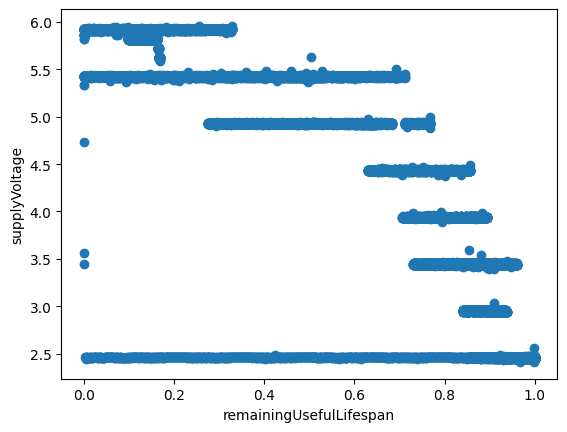

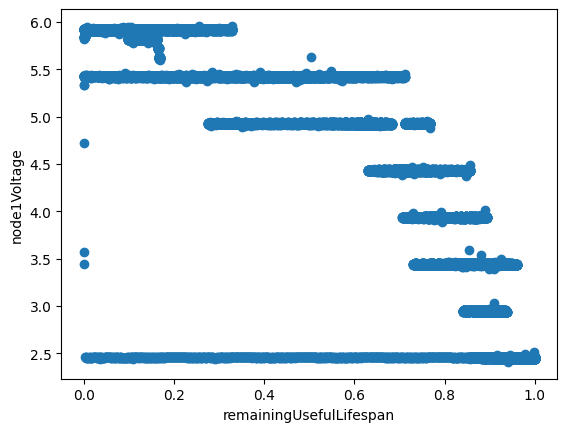

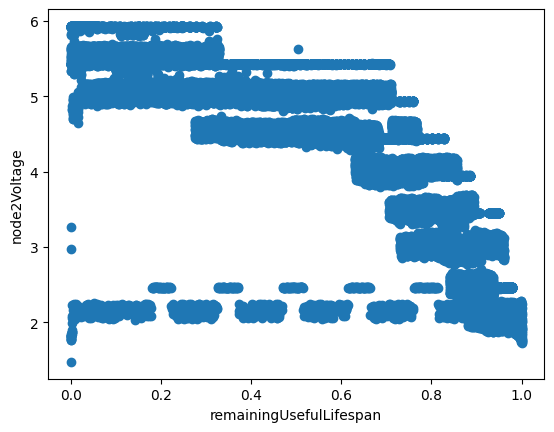

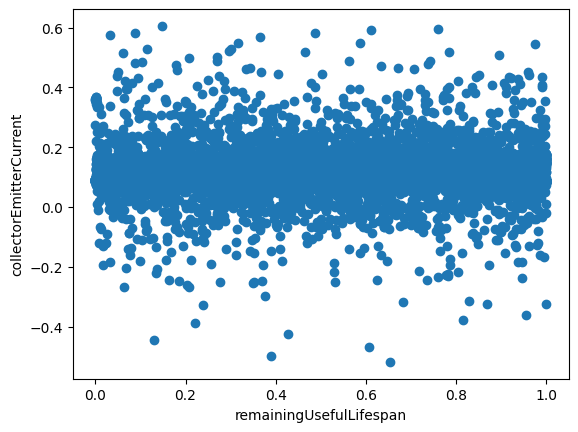

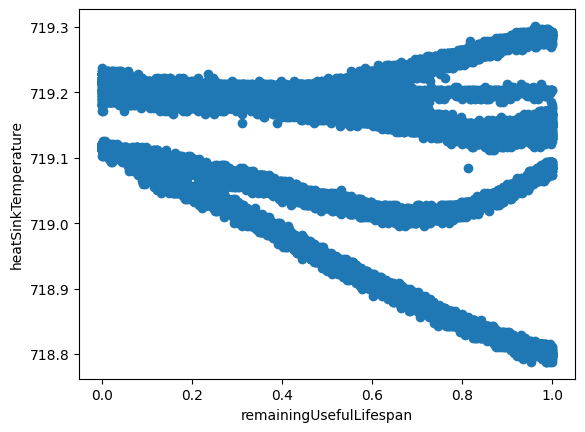

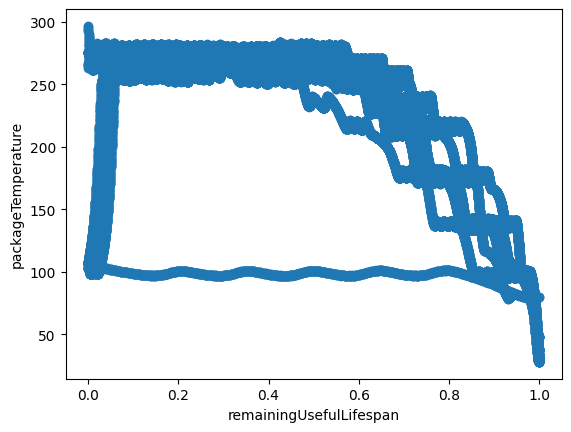

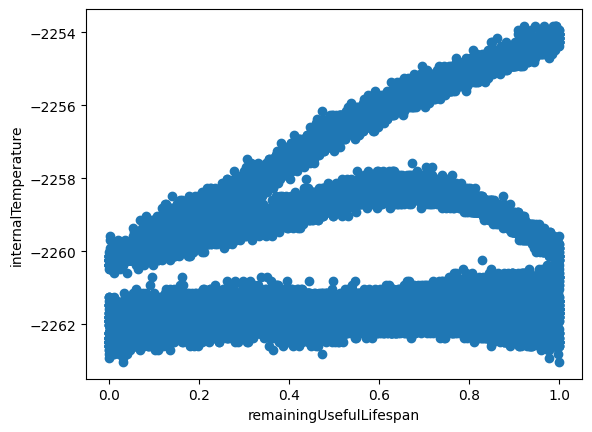

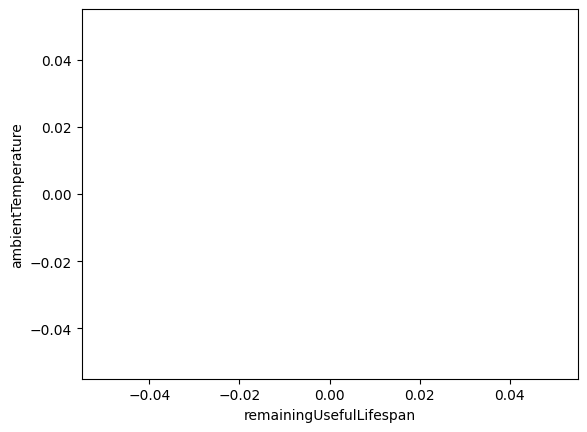

In [ ]:
# Scatterplots
for k in df:
  if df.dtypes[k] != 'object':
    for l in df:
      if k != l and df.dtypes[l] != 'object':
        ax = plt.subplot()
        ax.scatter(x = df[k], y = df[l])
        plt.xlabel(k)
        plt.ylabel(l)
        plt.show()

<ipython-input-4-3379c73ad594>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

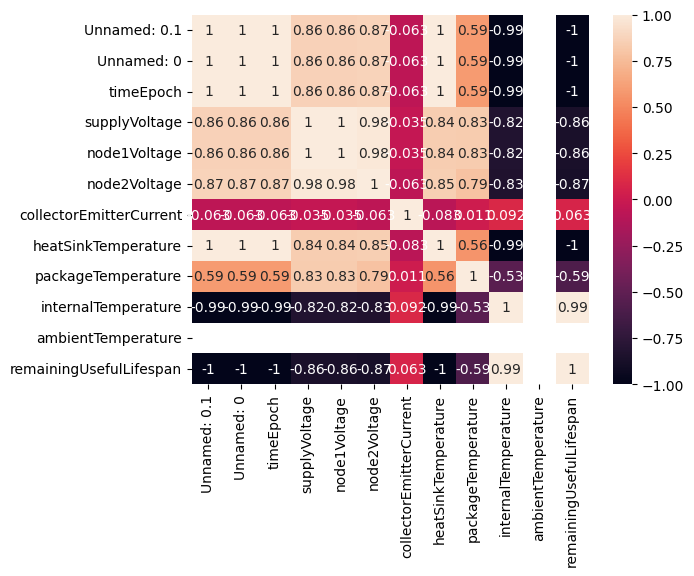

In [ ]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

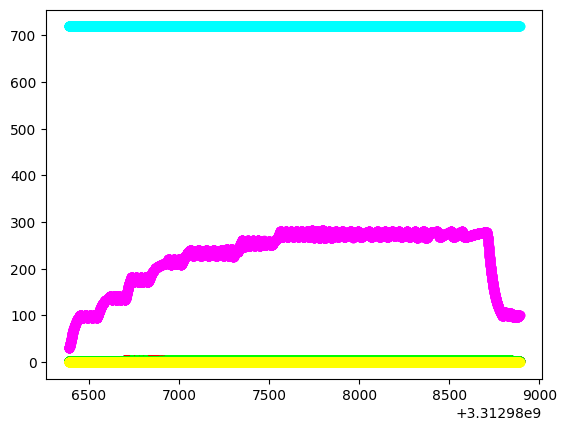

In [ ]:
# Time Series Plot
ax = plt.subplot()
ax.scatter(x = df['timeEpoch'], y = df['supplyVoltage'], c = [[0, 0, 1]])
ax.scatter(x = df['timeEpoch'], y = df['node1Voltage'], c = [[1, 0, 0]])
ax.scatter(x = df['timeEpoch'], y = df['node2Voltage'], c = [[0, 1, 0]])
ax.scatter(x = df['timeEpoch'], y = df['collectorEmitterCurrent'], c = [[1, 1, 0]])
ax.scatter(x = df['timeEpoch'], y = df['heatSinkTemperature'], c = [[0, 1, 1]])
ax.scatter(x = df['timeEpoch'], y = df['packageTemperature'], c = [[1, 0, 1]])
#ax.scatter(x = df['timeEpoch'], y = df['internalTemperature'], c = [[0, 0, 0]])

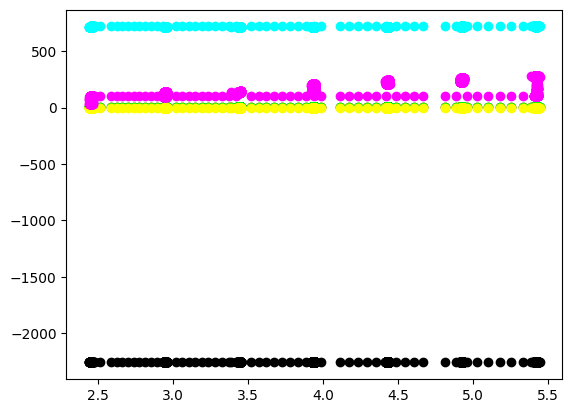

In [ ]:
ax = plt.subplot()
#ax.scatter(x = df['supplyVoltage'], y = df['timeEpoch'], c = [[0, 0, 1]])
ax.scatter(x = df['supplyVoltage'], y = df['node1Voltage'], c = [[1, 0, 0]])
ax.scatter(x = df['supplyVoltage'], y = df['node2Voltage'], c = [[0, 1, 0]])
ax.scatter(x = df['supplyVoltage'], y = df['collectorEmitterCurrent'], c = [[1, 1, 0]])
ax.scatter(x = df['supplyVoltage'], y = df['heatSinkTemperature'], c = [[0, 1, 1]])
ax.scatter(x = df['supplyVoltage'], y = df['packageTemperature'], c = [[1, 0, 1]])
ax.scatter(x = df['supplyVoltage'], y = df['internalTemperature'], c = [[0, 0, 0]])

## Data Preparation for Training

In [ ]:
#df = df.sample(frac=1).reset_index(drop=True)
# Generate training and test datasets
# Normalize data where starting is 1 and ending is 0
# Loss: ordinary least squares, boundary condition, monotonic decreasing
features = [
        'packageTemperature', # Shows the thermal stresses placed on the IGBT
        'supplyVoltage', # Shows the supply voltage, proxy for 2 other variables
        'collectorEmitterCurrent', # Interestingly distributed,
        'node1Voltage', # Do ablation study; see which features are actually needed
        #'timeEpoch',
        'node2Voltage',
        #'heatSinkTemperature',
        #'internalTemperature'
]

X_train = df[features]
y_train = df['remainingUsefulLifespan']
# To check resilience of model arch on different patterns, do randomized battery usage data
# Try having only 1 CSV and having multiple CSVs, see which does better; quantify differences between loading curves??; does ML model do a good job predicting on that loading curve
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [ ]:
files.upload()
test = pd.read_csv('2b.csv')
X_test = test[features]
y_test = test['remainingUsefulLifespan']

Saving 2b.csv to 2b.csv


In [ ]:
X_train

packageTemperature  supplyVoltage  collectorEmitterCurrent  \
0               30.404121       2.447730                 0.157385   
1               30.145092       2.443545                 0.083021   
2               30.080334       2.461683                 0.087395   
3               30.209849       2.461683                 0.174882   
4               30.371743       2.456102                 0.085208   
...                   ...            ...                      ...   
10737          106.154076       5.427972                 0.107080   
10738          105.943614       5.427972                 0.087395   
10739          106.024561       5.426576                 0.087395   
10740          105.765531       5.416810                 0.087395   
10741          105.943614       5.337281                 0.089582   

       node1Voltage  node2Voltage  
0          2.443165      1.910721  
1          2.450073      1.737816  
2          2.456981      2.013080  
3          2.443165      2.043511  
4          2.452836      1.824960  
...             ...           ...  
10737      5.423311      5.426913  
10738      5.426074      5.428296  
10739      5.426074      5.428296  
10740      5.419166      5.418613  
10741      5.336269      5.337002  

[10742 rows x 5 columns]

In [ ]:
print(y_train)

0       1.000000
1       0.999873
2       0.999740
3       0.999567
4       0.999414
          ...   
6429    0.000508
6430    0.000395
6431    0.000271
6432    0.000138
6433    0.000000
Name: remainingUsefulLifespan, Length: 6434, dtype: float64


In [ ]:
print(X_test)

      packageTemperature  supplyVoltage  collectorEmitterCurrent  \
0              47.402927       2.461683                 0.087395   
1              47.694335       2.460287                 0.087395   
2              47.775282       2.454706                 0.115829   
3              47.823850       2.460287                 0.087395   
4              47.710524       2.456102                 0.128952   
...                  ...            ...                      ...   
6429          292.219349       5.866078                 0.360793   
6430          293.028827       5.868869                 0.365167   
6431          294.032579       5.868869                 0.356418   
6432          295.424881       5.864683                 0.360793   
6433          296.590530       4.730349                 0.273305   

      node1Voltage  node2Voltage  
0         2.459744      2.241314  
1         2.458363      2.184602  
2         2.450073      2.221949  
3         2.458363      2.238548  
4       

## Baseline Model

In [ ]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
y_test_hat = baseline.predict(X_test)
print(y_test_hat)
print(math.sqrt(mean_squared_error(y_test, y_test_hat)))

NameError: ignored

## Neural Network

In [ ]:
def activation(x):
  # Insert regular activation function here
  # TODO: Find the shape of transistor degradation over time in real life and make that my activation function
  return keras.backend.switch(x > 1, 1 - (x - x // 1), keras.backend.switch(x < 0, 1 - (abs(x) - (abs(x) // 1)), x))


In [ ]:
def recurrent_activation(x):
  # Insert recurrent activation function here
  return x

In [ ]:
def placeholder_loss(y_true, y_pred):
  # Modded RMSE: punish overestimates more than underestimates
  # Maybe triple the error for overestimates
  # Also add NBTI to modded RMSE
  squared_difference = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_difference, axis=-1)

In [ ]:
def rpow(x):
  return keras.backend.switch(x > 1, x / x, keras.backend.switch(x < 0, 0 / x, x * x * x))

In [ ]:
def pow(x):
  return x * x * x * x * x

In [ ]:
def optimizer():
  # Return optimizer to use
  return keras.optimizers.Adam(lr=0.001)

In [ ]:
def get_model():
  model = keras.Sequential()
  keras.saving.get_custom_objects().update({'activation': keras.activations.sigmoid, 'recurrent_activation': keras.activations.sigmoid, 'rpow': pow})
  #model.add(keras.Input(shape=(5,))) # change shape later
  model.add(keras.layers.Reshape((1,5)))
  model.add(keras.layers.Conv1D(filters=8, kernel_size=3, padding='same', activation=None))
  model.add(keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(4, activation='activation', recurrent_activation='recurrent_activation', return_sequences=True)))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.LSTM(2, activation='activation', recurrent_activation='recurrent_activation'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(2, activation='sigmoid'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(1, activation='rpow'))
  model.compile(optimizer=optimizer(), loss=placeholder_loss, metrics=None)
  return model

In [ ]:
def get_model(): #USE THIS ONE
  model = keras.Sequential()
  keras.saving.get_custom_objects().update({'activation': keras.activations.sigmoid, 'recurrent_activation': keras.activations.sigmoid, 'rpow': pow})
  model.add(keras.Input(shape=(5,)))
  model.add(keras.layers.Reshape((1,5)))
  model.add(keras.layers.Conv1D(filters=9, kernel_size=3, padding='same', activation='sigmoid'))
  model.add(keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same'))
  model.add(keras.layers.GRU(4, activation='sigmoid', recurrent_activation='sigmoid', return_sequences=True))
  model.add(keras.layers.GRU(4, activation='sigmoid', recurrent_activation='sigmoid'))
  #model.add(keras.layers.Dropout(0.7))
  model.add(keras.layers.Dense(1, activation='rpow'))
  model.compile(optimizer=optimizer(), loss=custom_mse, metrics=None)
  return model

In [ ]:
model = KerasRegressor(build_fn=get_model, epochs=120, batch_size=5)
history = model.fit(X_train, y_train, validation_split=0.4)
y_test_hat = model.predict(X_test)
print(y_test)
print(y_test_hat)
print(math.sqrt(mean_squared_error(y_test, y_test_hat)))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/120


Exception ignored in: <function _xla_gc_callback at 0x799d06aef640>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1289/1289 [==============================] - 114s 4ms/step - loss: 0.1257 - val_loss: 0.2469
Epoch 2/120
1289/1289 [==============================] - 4s 3ms/step - loss: 0.0225 - val_loss: 0.2630
Epoch 3/120
1289/1289 [==============================] - 4s 3ms/step - loss: 0.0117 - val_loss: 0.2879
Epoch 4/120
1289/1289 [==============================] - 4s 3ms/step - loss: 0.0107 - val_loss: 0.2471
Epoch 5/120
1289/1289 [==============================] - 6s 5ms/step - loss: 0.0100 - val_loss: 0.2579
Epoch 6/120
1289/1289 [==============================] - 6s 5ms/step - loss: 0.0090 - val_loss: 0.2027
Epoch 7/120
1289/1289 [==============================] - 4s 3ms/step - loss: 0.0080 - val_loss: 0.1971
Epoch 8/120
1289/1289 [==============================] - 4s 3ms/step - loss: 0.0076 - val_loss: 0.2094
Epoch 9/120
1289/1289 [==============================] - 5s 4ms/step - loss: 0.0066 - val_loss: 0.1947
Epoch 10/120
1289/1289 [==============================] - 4s 3ms/step - loss: 0.006

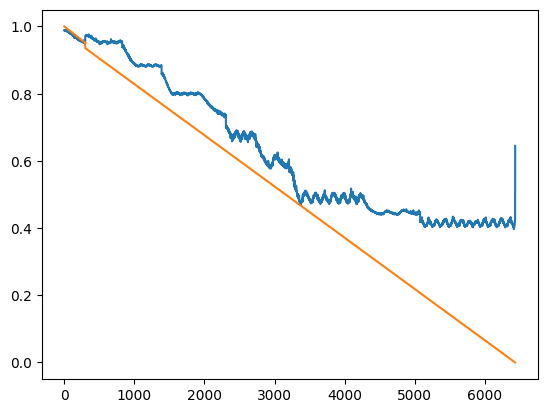

In [ ]:
plt.plot(range(len(y_test)), y_test_hat) #run this after every loss function run
plt.plot(range(len(y_test)), y_test)

In [ ]:
y_train_hat = model.predict(X_train)
plt.plot(range(len(y_train)), y_train_hat)
plt.plot(range(len(y_train)), y_train)

2149/2149 [==============================] - 3s 1ms/step


KeyboardInterrupt: ignored

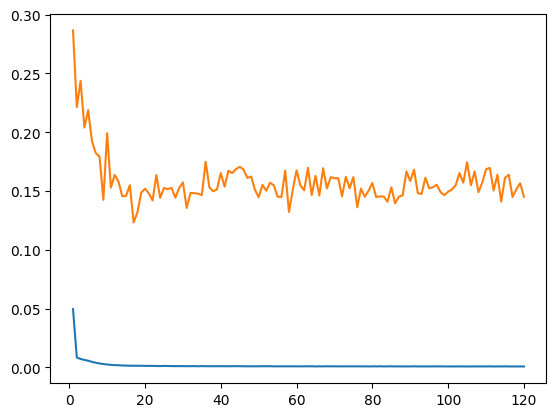

In [ ]:
vars = history.history_
plt.plot(range(1, len(vars['loss']) + 1), vars['loss'])
plt.plot(range(1, len(vars['val_loss']) + 1), vars['val_loss'])

## Loss function

Text(0.5, 0, '# of Epochs')

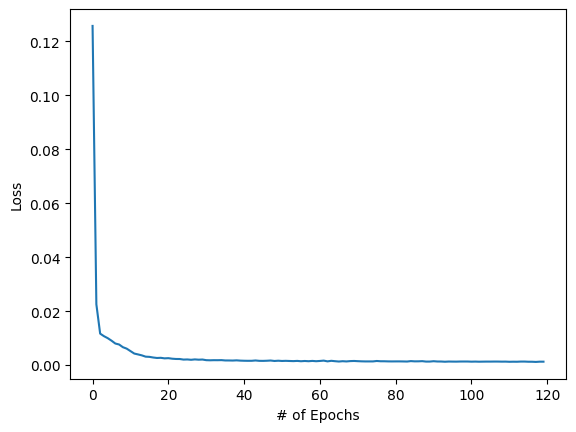

In [ ]:
import keras.backend as K

def custom_mse(y_true, y_pred):

    false_positive_weight = 1.0
    false_negative_weight = 2.0

    # Calculate binary cross entropy
    bce = tf.keras.losses.MeanSquaredError()

    # Calculate loss
    loss = bce(y_true, y_pred)

    # Calculate weighted loss
    weighted_loss = tf.where(tf.greater(y_true, y_pred), false_negative_weight * loss, false_positive_weight * loss)

    return tf.reduce_mean(weighted_loss)

    loss = loss * [0.8]         # (batch_size, 2)

    # summing both loss values along batch dimension
    loss = K.sum(loss, axis=1)        # (batch_size,)

    return loss

plt.plot(history.history_['loss'])
plt.ylabel('Loss')
plt.xlabel('# of Epochs')